In [1]:
import pandas as pd

In [2]:
df_lidar = pd.read_table('../training_data/lidar_2rounds', sep=",", index_col=0)
df_lidar.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7.4565,6.8632,8.4021,10.2755,12.9451,9.7520,5.7550,5.8843,3.9540,20.0,20.0,5.2561,2.7631,4.3158,5.5333,1.4624,-32.0,0.966667
1,7.4570,6.8637,8.4026,10.2759,12.9455,9.7523,5.7554,5.8845,3.9542,20.0,20.0,5.2564,2.7635,4.3162,5.5337,1.4628,-32.0,0.966667
2,7.4565,6.8633,8.4022,10.2756,12.9452,11.2514,5.7551,5.8844,20.0000,20.0,20.0,5.2560,2.7631,4.3157,5.5332,1.4624,-32.0,0.966667
3,7.4554,6.8621,8.4012,10.2746,12.9443,11.2507,5.7545,5.8839,20.0000,20.0,20.0,5.2550,2.7620,4.3146,5.5320,1.4612,-32.0,0.966667
4,7.4533,6.8601,8.3994,10.2729,12.9429,11.2495,5.7534,5.8832,20.0000,20.0,20.0,5.2533,2.7600,4.3126,5.5299,1.4590,-32.0,0.966667


In [3]:
df_sonar = pd.read_csv('../training_data/sonar.samples', sep=" ", header=None)
df_sonar.head()

,0,1,2,3
0,1.5067,1.3101,1.7966,-22.0
1,1.5075,1.3106,1.7970,-22.0
2,1.5075,1.3106,1.7970,-22.0
3,1.5075,1.3106,1.7970,-22.0
4,1.5075,1.3106,1.7970,-22.0


In [4]:
display(df_lidar.describe())
df_sonar.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.0,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000
mean,10.693885,8.967424,9.769526,8.566755,9.177894,7.244609,8.707776,7.357612,14.008577,20.0,16.453719,14.921087,15.125725,14.501483,13.905103,11.930902,2.303507,1.342291
std,7.652275,7.376931,7.386916,7.180727,7.311107,6.133312,6.572315,5.748568,6.605551,0.0,6.392659,7.513922,7.336148,7.803161,7.936621,8.340058,13.854609,0.172958
min,0.414600,0.525200,0.523800,0.618800,0.511600,0.417700,0.375900,0.339300,0.322900,20.0,0.361900,0.196700,0.209900,0.225400,0.181100,0.261600,-54.500000,0.591667
25%,3.681450,3.221025,3.645825,2.777900,2.713675,3.079200,3.745200,3.610550,7.569425,20.0,20.000000,6.336300,6.655275,5.550175,5.495475,3.033000,-2.500000,1.266667
50%,7.083500,5.242600,6.477100,5.751850,6.973350,5.057700,6.604600,5.511900,15.596000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.500000,1.408333
75%,20.000000,20.000000,20.000000,20.000000,20.000000,9.314150,11.631475,8.917025,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,7.500000,1.466667
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,53.000000,1.500000


,0,1,2,3
count,5920.000000,5920.000000,5.920000e+03,5920.000000
mean,1.885385,1.540811,8.445946e+16,3.326014
std,0.386761,0.570198,2.905209e+18,10.068282
min,0.543400,0.360300,6.499000e-01,-22.000000
25%,1.655500,1.288975,1.034200e+00,0.000000
50%,1.854600,1.497100,1.169600e+00,0.000000
75%,2.084300,1.698600,1.328225e+00,0.000000
max,3.253800,7.921100,1.000000e+20,22.000000


In [5]:
# build pipeline to find duplicates, count them and remove them and to normalize the data between 0 and 1

duplicates_lidar = len(df_lidar[df_lidar.duplicated()])
duplicates_sonar = len(df_sonar[df_sonar.duplicated()])

print(f"# of duplicates found:\nLidar: {duplicates_lidar} of {len(df_lidar)} items\nSonar: {duplicates_sonar} of {len(df_sonar)} items")
 

# of duplicates found:
Lidar: 330 of 3308 items
Sonar: 4182 of 5920 items


In [6]:
lidar_no_dup = df_lidar[~df_lidar.duplicated()]
sonar_no_dup = df_sonar[~df_sonar.duplicated()]

len(lidar_no_dup)

2978

In [15]:
import numpy as np
import torch
from torch import nn
import torch.utils.data as tud

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

class Dataset(tud.Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, data):
            'Initialization'
            self.data = torch.tensor(np.array(data))
            

    def __len__(self):
            'Denotes the total number of samples'
            return len(self.data)

    def __getitem__(self, index):
            'Generates one sample of data'
            # Select sample
            sample = self.data[index]

            # return x and y
            X = sample[:-2]
            y = sample[-2]
            return X.to(torch.float32), y.to(torch.float32)

# LIDAR INPUT
n_inputs = 16

model = nn.Sequential(
    nn.Linear(n_inputs, 64),
#     nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(64, 128),
#     nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(128, 1)

).to(DEVICE)


cuda


Training...


  0%|          | 1/2000 [00:00<04:48,  6.93it/s]

130.47926956176758


  0%|          | 2/2000 [00:00<04:16,  7.78it/s]

129.78594818115235


  0%|          | 3/2000 [00:00<04:11,  7.95it/s]

130.16868789672853


  0%|          | 5/2000 [00:00<03:34,  9.29it/s]

129.35766159057619
128.85593734741212
128.1921536254883


  0%|          | 7/2000 [00:00<03:20,  9.94it/s]

128.52155029296875
127.86476318359375


  0%|          | 9/2000 [00:00<03:06, 10.65it/s]

127.05558639526367


  1%|          | 11/2000 [00:01<03:00, 11.00it/s]

126.90900100708008
126.69016586303711
126.33481719970703


  1%|          | 13/2000 [00:01<02:56, 11.25it/s]

126.14894805908203
125.57364501953126


  1%|          | 15/2000 [00:01<02:52, 11.54it/s]

125.35805404663085


  1%|          | 17/2000 [00:01<02:49, 11.70it/s]

124.79939575195313
125.08953033447266
124.12735473632813


  1%|          | 19/2000 [00:01<02:47, 11.82it/s]

124.0135807800293
123.81865859985352


  1%|          | 21/2000 [00:01<02:45, 11.93it/s]

123.08757873535156


  1%|          | 23/2000 [00:02<02:47, 11.80it/s]

123.20551376342773
122.50957214355469
122.29418106079102


  1%|▏         | 25/2000 [00:02<02:55, 11.24it/s]

122.11639724731445
121.80919494628907


  1%|▏         | 27/2000 [00:02<02:51, 11.49it/s]

121.47910263061523


  1%|▏         | 29/2000 [00:02<02:49, 11.66it/s]

120.61862411499024
120.4742236328125
120.24551605224609


  2%|▏         | 31/2000 [00:02<02:47, 11.75it/s]

119.78197082519532
119.5541951751709


  2%|▏         | 33/2000 [00:02<02:43, 12.03it/s]

119.4561343383789


  2%|▏         | 35/2000 [00:03<02:43, 12.00it/s]

118.6805248260498
118.30585792541504
118.23961128234863


  2%|▏         | 37/2000 [00:03<02:43, 12.00it/s]

118.03358512878418
117.65453079223633


  2%|▏         | 39/2000 [00:03<02:41, 12.14it/s]

117.0618790435791


  2%|▏         | 41/2000 [00:03<02:40, 12.21it/s]

116.645630569458
116.4105534362793
116.01663650512695


  2%|▏         | 43/2000 [00:03<02:39, 12.25it/s]

116.30604270935059
115.50558448791504


  2%|▏         | 45/2000 [00:03<02:37, 12.42it/s]

114.86480361938476


  2%|▏         | 47/2000 [00:04<02:38, 12.33it/s]

114.46477172851563
114.01397857666015
114.45439331054688


  2%|▏         | 49/2000 [00:04<02:38, 12.31it/s]

113.48543823242187
113.19339752197266


  3%|▎         | 51/2000 [00:04<02:37, 12.36it/s]

113.11870399475097


  3%|▎         | 53/2000 [00:04<02:37, 12.35it/s]

112.85973037719727
112.86893798828125
111.72386375427246


  3%|▎         | 55/2000 [00:04<02:38, 12.24it/s]

111.83644912719727
111.26166015625


  3%|▎         | 57/2000 [00:04<02:37, 12.35it/s]

110.88835662841797


  3%|▎         | 59/2000 [00:05<02:36, 12.39it/s]

110.53115036010742
110.44703559875488
110.46669815063477


  3%|▎         | 61/2000 [00:05<02:36, 12.39it/s]

109.4111432647705
109.31563919067383


  3%|▎         | 63/2000 [00:05<02:36, 12.34it/s]

108.93029159545898


  3%|▎         | 65/2000 [00:05<02:37, 12.28it/s]

108.87885879516601
108.58759101867676
108.23075485229492


  3%|▎         | 67/2000 [00:05<02:37, 12.31it/s]

107.74765975952148
107.54415435791016


  3%|▎         | 69/2000 [00:05<02:36, 12.36it/s]

107.21783905029297


  4%|▎         | 71/2000 [00:06<02:37, 12.21it/s]

106.76653129577636
106.4484285736084
106.46255996704102


  4%|▎         | 73/2000 [00:06<02:38, 12.15it/s]

106.10391448974609
105.83287796020508


  4%|▍         | 75/2000 [00:06<02:36, 12.27it/s]

105.51964401245117


  4%|▍         | 77/2000 [00:06<02:37, 12.21it/s]

104.8805288696289
104.82428855895996
105.20127227783203


  4%|▍         | 79/2000 [00:06<02:38, 12.10it/s]

104.5849942779541
104.15757530212403


  4%|▍         | 81/2000 [00:06<02:43, 11.72it/s]

103.70308082580567


  4%|▍         | 83/2000 [00:07<02:51, 11.15it/s]

103.77923126220703
103.14864051818847
103.00333503723145


  4%|▍         | 85/2000 [00:07<02:53, 11.04it/s]

103.05323173522949
102.4902700805664


  4%|▍         | 87/2000 [00:07<02:54, 10.94it/s]

102.17846817016601


  4%|▍         | 89/2000 [00:07<02:55, 10.87it/s]

101.6009732055664
101.62170692443847
101.64568176269532


  5%|▍         | 91/2000 [00:07<02:57, 10.78it/s]

101.40542625427246
100.79565422058106


  5%|▍         | 93/2000 [00:08<02:57, 10.73it/s]

101.43126602172852


  5%|▍         | 95/2000 [00:08<02:57, 10.73it/s]

100.16743316650391
100.20591667175293
100.21106353759765


  5%|▍         | 97/2000 [00:08<02:57, 10.71it/s]

100.05176658630371
99.62673622131348


  5%|▍         | 99/2000 [00:08<02:57, 10.71it/s]

99.42168533325196


  5%|▌         | 101/2000 [00:08<02:55, 10.83it/s]

98.8701333618164
99.20990570068359
98.95673751831055


  5%|▌         | 103/2000 [00:08<02:56, 10.76it/s]

98.40999702453614
98.16003860473633


  5%|▌         | 105/2000 [00:09<02:55, 10.80it/s]

98.37054656982421


  5%|▌         | 107/2000 [00:09<02:54, 10.86it/s]

97.65145446777343
97.56162300109864
97.45902381896973


  5%|▌         | 109/2000 [00:09<02:55, 10.79it/s]

97.20316444396973
96.93372779846192


  6%|▌         | 113/2000 [00:09<02:59, 10.49it/s]

96.90365638732911
96.43985275268555
96.46757843017578


  6%|▌         | 115/2000 [00:10<02:58, 10.59it/s]

96.00214134216309
95.88506988525391
95.62435363769531


  6%|▌         | 119/2000 [00:10<02:54, 10.77it/s]

95.49655601501465
95.30258575439453
95.60528831481933


  6%|▌         | 121/2000 [00:10<02:53, 10.83it/s]

95.37138359069824
94.71755348205566
94.57335647583008


  6%|▋         | 125/2000 [00:10<02:52, 10.86it/s]

94.58226692199707
94.54559539794921
93.90631690979004


  6%|▋         | 127/2000 [00:11<02:52, 10.86it/s]

94.07422660827636
94.23258895874024
93.34393035888672


  7%|▋         | 131/2000 [00:11<02:50, 10.97it/s]

93.97533836364747
93.28893836975098
93.27028770446778


  7%|▋         | 133/2000 [00:11<02:50, 10.96it/s]

93.66716827392578
92.95172470092774
92.70402000427246


  7%|▋         | 137/2000 [00:12<02:51, 10.89it/s]

93.05969078063964
92.47478866577148
92.51085708618164


  7%|▋         | 139/2000 [00:12<02:50, 10.89it/s]

92.13222778320312
91.71843933105468
91.66493186950683


  7%|▋         | 143/2000 [00:12<02:49, 10.93it/s]

91.71387084960938
92.05468910217286
91.69152923583984


  7%|▋         | 145/2000 [00:12<02:49, 10.97it/s]

91.09611534118652
90.96046691894531
90.91833786010743


  7%|▋         | 149/2000 [00:13<02:48, 10.97it/s]

91.06064002990723
91.10187965393067
91.03898048400879


  8%|▊         | 151/2000 [00:13<02:48, 10.97it/s]

90.61806571960449
90.44265167236328
90.57614807128907


  8%|▊         | 155/2000 [00:13<02:50, 10.84it/s]

90.77542755126953
90.14163223266601
90.10536460876465


  8%|▊         | 157/2000 [00:13<02:49, 10.88it/s]

90.25480400085449
89.84854858398438
89.61769180297851


  8%|▊         | 161/2000 [00:14<02:49, 10.84it/s]

89.76552383422852
89.76368865966796
89.12417877197265


  8%|▊         | 163/2000 [00:14<02:51, 10.72it/s]

89.21620979309083
89.53206214904785
89.12694068908691


  8%|▊         | 167/2000 [00:14<02:50, 10.73it/s]

88.73466079711915
88.81072395324708
88.63147331237793


  8%|▊         | 169/2000 [00:15<02:49, 10.79it/s]

88.92033065795898
88.39000942230224
88.20736999511719


  9%|▊         | 173/2000 [00:15<02:51, 10.63it/s]

87.9305487060547
88.16475440979004
88.13709838867187


  9%|▉         | 175/2000 [00:15<02:49, 10.75it/s]

87.6548868560791
87.6516049194336
87.44193794250488


  9%|▉         | 179/2000 [00:15<02:50, 10.69it/s]

87.4352020263672
87.34151962280274
87.41438926696777


  9%|▉         | 181/2000 [00:16<02:47, 10.88it/s]

87.34969146728515
87.45888900756836
86.92055961608887


  9%|▉         | 185/2000 [00:16<02:47, 10.81it/s]

86.84810020446777
87.13553123474121
86.68106040954589


  9%|▉         | 187/2000 [00:16<02:46, 10.89it/s]

86.49200149536132
86.49557731628418
86.42028259277343


 10%|▉         | 191/2000 [00:17<02:46, 10.87it/s]

86.20657737731933
86.03282447814941
85.87776672363282


 10%|▉         | 193/2000 [00:17<02:46, 10.88it/s]

85.99164474487304
85.71683113098145
85.85902946472169


 10%|▉         | 197/2000 [00:17<02:45, 10.87it/s]

85.32540908813476
85.89942352294922
85.53584571838378


 10%|▉         | 199/2000 [00:17<02:44, 10.95it/s]

85.79825843811035
85.20762725830077
85.44565277099609


 10%|█         | 203/2000 [00:18<02:44, 10.95it/s]

85.26500946044922
84.94730545043946
84.96538917541504


 10%|█         | 205/2000 [00:18<02:44, 10.92it/s]

85.11365699768066
84.68864974975585
84.98944274902344


 10%|█         | 209/2000 [00:18<02:43, 10.92it/s]

84.6901262664795
84.35755981445313
84.4643564605713


 11%|█         | 211/2000 [00:18<02:43, 10.95it/s]

84.36090408325195
84.05202156066895
84.1425644683838


 11%|█         | 215/2000 [00:19<02:43, 10.89it/s]

84.150121383667
83.79678131103516
83.70414291381836


 11%|█         | 217/2000 [00:19<02:42, 10.94it/s]

83.9953895187378
84.20269981384277
83.46596229553222


 11%|█         | 221/2000 [00:19<02:42, 10.94it/s]

83.79359535217286
83.56987632751465
83.4720287322998


 11%|█         | 223/2000 [00:20<02:43, 10.89it/s]

83.52066513061523
83.26080017089843
83.23729949951172


 11%|█▏        | 227/2000 [00:20<02:44, 10.76it/s]

83.05224945068359
83.15089019775391
83.18278442382812


 11%|█▏        | 229/2000 [00:20<02:43, 10.85it/s]

82.95333396911622
83.1537956237793
82.94309524536133


 12%|█▏        | 233/2000 [00:20<02:43, 10.83it/s]

82.64082908630371
82.62760093688965
82.83058815002441


 12%|█▏        | 235/2000 [00:21<02:37, 11.18it/s]

82.34081489562988
82.37560981750488
82.48342742919922


 12%|█▏        | 239/2000 [00:21<02:31, 11.66it/s]

82.63526832580567
82.42942489624023
81.98929710388184


 12%|█▏        | 241/2000 [00:21<02:27, 11.89it/s]

82.38626541137695
82.13979713439942
82.0334252166748


 12%|█▏        | 245/2000 [00:21<02:25, 12.09it/s]

81.93365051269531
81.69192329406738
81.59049980163574


 12%|█▏        | 247/2000 [00:22<02:24, 12.17it/s]

81.41507995605468
81.38430686950683
81.51894332885742


 13%|█▎        | 251/2000 [00:22<02:25, 12.04it/s]

81.85701591491699
81.33501914978028
81.30847259521484


 13%|█▎        | 253/2000 [00:22<02:24, 12.11it/s]

81.24661430358887
81.1983196258545
81.30918128967285


 13%|█▎        | 257/2000 [00:22<02:24, 12.04it/s]

81.1311799621582
80.88776420593261
80.64572807312011


 13%|█▎        | 259/2000 [00:23<02:22, 12.21it/s]

80.59873874664306
80.88447830200195
80.70937461853028


 13%|█▎        | 263/2000 [00:23<02:20, 12.36it/s]

80.37022232055664
80.36267524719239
80.51226104736328


 13%|█▎        | 265/2000 [00:23<02:20, 12.33it/s]

80.28336967468262
80.191904296875
80.21492965698242


 13%|█▎        | 269/2000 [00:23<02:20, 12.28it/s]

80.13861251831055
80.00530097961426
80.29484420776367


 14%|█▎        | 271/2000 [00:24<02:23, 12.08it/s]

79.9772467803955
79.63009803771973
80.09186866760254


 14%|█▍        | 275/2000 [00:24<02:21, 12.17it/s]

79.85681861877441
79.81640609741211
80.13212562561036


 14%|█▍        | 277/2000 [00:24<02:24, 11.90it/s]

79.67440040588379
79.65790023803712
79.23600357055665


 14%|█▍        | 281/2000 [00:24<02:22, 12.04it/s]

79.35747299194335
79.20155929565429
79.44552993774414


 14%|█▍        | 283/2000 [00:25<02:22, 12.04it/s]

79.43026771545411
79.25556205749511
78.85769104003906


 14%|█▍        | 287/2000 [00:25<02:21, 12.12it/s]

78.94199424743653
78.87578819274903
78.71285034179688


 14%|█▍        | 289/2000 [00:25<02:20, 12.16it/s]

78.88657356262208
79.01466491699219
78.61285430908202


 15%|█▍        | 293/2000 [00:25<02:19, 12.24it/s]

78.74688056945801
78.46330627441407
78.53636085510254


 15%|█▍        | 295/2000 [00:26<02:20, 12.18it/s]

78.28581085205079
78.31939765930176
78.40537811279297


 15%|█▍        | 299/2000 [00:26<02:20, 12.14it/s]

78.00918579101562
78.21672027587891
78.10722785949707


 15%|█▌        | 301/2000 [00:26<02:19, 12.15it/s]

78.08375244140625
77.73331909179687
77.85185272216796


 15%|█▌        | 305/2000 [00:26<02:17, 12.31it/s]

77.80034782409668
78.00371612548828
77.64414535522461


 15%|█▌        | 307/2000 [00:27<02:16, 12.36it/s]

77.45819007873536
77.78993309020996
77.69579025268554


 16%|█▌        | 311/2000 [00:27<02:17, 12.29it/s]

77.0870435333252
77.30256889343262
77.58019966125488


 16%|█▌        | 313/2000 [00:27<02:15, 12.43it/s]

77.29542640686036
76.95057838439942
77.10038009643554


 16%|█▌        | 317/2000 [00:27<02:16, 12.29it/s]

77.51537429809571
76.87366134643554
77.3734423828125


 16%|█▌        | 319/2000 [00:28<02:17, 12.25it/s]

76.81547866821289
77.03606185913085
76.90430320739746


 16%|█▌        | 323/2000 [00:28<02:21, 11.87it/s]

76.9424967956543
76.73593490600587
76.74479454040528


 16%|█▋        | 325/2000 [00:28<02:18, 12.10it/s]

76.40390144348144
76.29760902404786
76.44446403503417


 16%|█▋        | 329/2000 [00:28<02:17, 12.19it/s]

76.32612983703613
76.16521911621093
76.29805534362794


 17%|█▋        | 331/2000 [00:29<02:16, 12.23it/s]

76.11885627746582
76.03752662658691
76.08498840332031


 17%|█▋        | 335/2000 [00:29<02:16, 12.20it/s]

76.13291107177734
76.03326263427735
76.24116241455079


 17%|█▋        | 337/2000 [00:29<02:15, 12.25it/s]

76.15496841430664
75.67833053588868
75.77573600769043


 17%|█▋        | 341/2000 [00:29<02:15, 12.23it/s]

75.68489570617676
76.05614631652833
75.5735057067871


 17%|█▋        | 343/2000 [00:29<02:14, 12.30it/s]

75.57233268737792
75.21232261657715
75.15624137878417


 17%|█▋        | 347/2000 [00:30<02:16, 12.12it/s]

75.22031768798828
75.07675411224365
75.11801109313964


 17%|█▋        | 349/2000 [00:30<02:15, 12.19it/s]

75.18651222229003
75.21631313323975
75.23417205810547


 18%|█▊        | 353/2000 [00:30<02:15, 12.14it/s]

74.71776054382325
74.84517799377441
74.96129844665528


 18%|█▊        | 355/2000 [00:30<02:14, 12.28it/s]

74.93578544616699
74.53552726745606
74.58740242004394


 18%|█▊        | 359/2000 [00:31<02:16, 11.99it/s]

74.84316917419433
74.89332138061523
74.51743965148925


 18%|█▊        | 361/2000 [00:31<02:15, 12.11it/s]

74.01998718261719
74.48699195861816
74.4476749420166


 18%|█▊        | 365/2000 [00:31<02:13, 12.22it/s]

74.86735984802246
74.07953796386718
74.31971305847168


 18%|█▊        | 367/2000 [00:31<02:17, 11.86it/s]

74.20896362304687
73.75684509277343
74.24665248870849


 19%|█▊        | 371/2000 [00:32<02:14, 12.14it/s]

73.73533805847168
74.23159896850586
74.1711075592041


 19%|█▊        | 373/2000 [00:32<02:13, 12.22it/s]

73.47978103637695
73.32710586547852
73.66990325927735


 19%|█▉        | 377/2000 [00:32<02:12, 12.27it/s]

73.73900955200196
73.38553962707519
73.23041107177734


 19%|█▉        | 379/2000 [00:32<02:12, 12.23it/s]

73.35837882995605
73.40228523254395
73.06263061523437


 19%|█▉        | 383/2000 [00:33<02:12, 12.20it/s]

73.20946243286133
73.33780090332031
73.21003505706787


 19%|█▉        | 385/2000 [00:33<02:13, 12.09it/s]

73.13189117431641
72.84873649597168
72.98894470214844


 19%|█▉        | 389/2000 [00:33<02:13, 12.07it/s]

72.67575103759765
72.96040237426757
72.75272468566895


 20%|█▉        | 391/2000 [00:33<02:13, 12.07it/s]

73.03444465637207
72.41126113891602
72.27761322021485


 20%|█▉        | 395/2000 [00:34<02:14, 11.91it/s]

72.57307495117188
72.48743896484375
72.45281188964844


 20%|█▉        | 397/2000 [00:34<02:13, 11.97it/s]

72.22824783325196
72.69278465270996
72.01022079467774


 20%|██        | 401/2000 [00:34<02:12, 12.09it/s]

72.49569168090821
72.27734512329101
72.07758560180665


 20%|██        | 403/2000 [00:34<02:11, 12.11it/s]

71.9970864868164
71.77015384674073
71.90909896850586


 20%|██        | 407/2000 [00:35<02:11, 12.16it/s]

71.98046997070313
71.98177131652832
72.04801231384278


 20%|██        | 409/2000 [00:35<02:12, 12.03it/s]

71.67752174377442
71.45785091400147
71.47531929016114


 21%|██        | 413/2000 [00:35<02:15, 11.70it/s]

71.37206794738769
71.55566627502441
71.30985717773437


 21%|██        | 415/2000 [00:35<02:14, 11.82it/s]

71.35461242675781
71.02079292297363
71.3025495147705


 21%|██        | 419/2000 [00:36<02:14, 11.79it/s]

71.12829055786133
70.99904602050782
71.03711639404297


 21%|██        | 421/2000 [00:36<02:13, 11.85it/s]

71.16445980072021
71.01063079833985
70.87560871124268


 21%|██▏       | 425/2000 [00:36<02:11, 11.97it/s]

71.27127250671387
70.75908279418945
70.59549156188965


 21%|██▏       | 427/2000 [00:36<02:09, 12.17it/s]

70.8203231048584
70.51663948059083
70.53290756225586


 22%|██▏       | 431/2000 [00:37<02:09, 12.13it/s]

70.72841972351074
70.46438087463379
70.7522942352295


 22%|██▏       | 433/2000 [00:37<02:08, 12.16it/s]

70.2351537322998
70.2554451751709
70.27911392211914


 22%|██▏       | 437/2000 [00:37<02:10, 12.01it/s]

70.11374626159667
70.35462860107423
70.10034591674804


 22%|██▏       | 439/2000 [00:37<02:09, 12.09it/s]

70.20664100646972
70.09415306091309
70.36644958496093


 22%|██▏       | 443/2000 [00:38<02:08, 12.11it/s]

69.96580070495605
69.89778518676758
69.73609382629394


 22%|██▏       | 445/2000 [00:38<02:08, 12.07it/s]

70.278696975708
69.7580869293213
69.83931900024415


 22%|██▏       | 449/2000 [00:38<02:07, 12.17it/s]

69.73357864379882
69.16705371856689
69.62518882751465


 23%|██▎       | 451/2000 [00:38<02:09, 11.94it/s]

69.74631523132324
69.42347602844238
69.36815826416016


 23%|██▎       | 455/2000 [00:39<02:08, 12.05it/s]

69.47297981262207
69.1517936706543
69.32144927978516


 23%|██▎       | 457/2000 [00:39<02:08, 11.97it/s]

69.30870880126953
69.2292765045166
69.0052579498291


 23%|██▎       | 461/2000 [00:39<02:07, 12.11it/s]

69.09159996032714
69.08945640563965
68.93712558746338


 23%|██▎       | 463/2000 [00:39<02:06, 12.12it/s]

68.93881713867188
69.32352836608887
68.99277690887452


 23%|██▎       | 467/2000 [00:40<02:07, 11.99it/s]

68.9018130493164
68.55982467651367
68.76981788635254


 23%|██▎       | 469/2000 [00:40<02:06, 12.06it/s]

68.60835243225098
68.61612167358399
68.46219108581543


 24%|██▎       | 473/2000 [00:40<02:09, 11.80it/s]

68.74034393310546
68.67084091186524
68.3176887512207


 24%|██▍       | 475/2000 [00:40<02:07, 11.99it/s]

68.50834045410156
68.31918251037598
68.69983680725097


 24%|██▍       | 479/2000 [00:41<02:06, 11.98it/s]

68.34753562927246
68.00828239440918
68.57541404724121


 24%|██▍       | 481/2000 [00:41<02:06, 12.01it/s]

68.21591842651367
68.67780197143554
68.3116044998169


 24%|██▍       | 485/2000 [00:41<02:06, 11.99it/s]

67.95096153259277
68.06824409484864
67.75091514587402


 24%|██▍       | 487/2000 [00:41<02:04, 12.12it/s]

67.99771507263183
67.98417320251465
67.93804466247559


 25%|██▍       | 491/2000 [00:42<02:09, 11.69it/s]

67.64046142578125
67.35713954925536
67.87988822937012


 25%|██▍       | 493/2000 [00:42<02:08, 11.74it/s]

67.62797622680664
67.56382415771485
67.66786849975585


 25%|██▍       | 497/2000 [00:42<02:06, 11.89it/s]

67.37793449401856
67.6668717956543
67.63758750915527


 25%|██▍       | 499/2000 [00:42<02:04, 12.03it/s]

67.51237548828125
67.38663688659668
67.4619002532959


 25%|██▌       | 503/2000 [00:43<02:05, 11.90it/s]

67.08413536071777
66.99198078155517
66.979235496521


 25%|██▌       | 505/2000 [00:43<02:04, 12.05it/s]

67.36091815948487
67.2273112487793
66.86654052734374


 25%|██▌       | 509/2000 [00:43<02:05, 11.91it/s]

67.05862991333008
66.82854976654053
67.04632690429688


 26%|██▌       | 511/2000 [00:43<02:04, 12.01it/s]

66.71015388488769
66.63156486511231
66.74158874511718


 26%|██▌       | 515/2000 [00:44<02:03, 12.05it/s]

66.56434608459473
66.55264938354492
66.74130187988281


 26%|██▌       | 517/2000 [00:44<02:03, 12.02it/s]

67.03607692718506
66.43748031616211
66.29478034973144


 26%|██▌       | 521/2000 [00:44<02:03, 12.00it/s]

66.3777244567871
66.46871643066406
66.45696044921876


 26%|██▌       | 523/2000 [00:44<02:02, 12.01it/s]

66.10013145446777
66.38340599060058
66.14842803955078


 26%|██▋       | 527/2000 [00:45<02:04, 11.79it/s]

66.2786669921875
66.17895874023438
66.38305671691894


 26%|██▋       | 529/2000 [00:45<02:03, 11.94it/s]

66.08506916046143
65.72762664794922
66.26981399536133


 27%|██▋       | 533/2000 [00:45<02:01, 12.05it/s]

65.46977851867676
65.50945430755615
65.7125643157959


 27%|██▋       | 535/2000 [00:46<02:01, 12.02it/s]

65.67834335327149
65.94508583068847
65.76679065704346


 27%|██▋       | 539/2000 [00:46<02:04, 11.78it/s]

65.63115982055665
65.43715431213379
65.95592628479004


 27%|██▋       | 541/2000 [00:46<02:02, 11.88it/s]

65.61895347595215
65.4260270690918
65.28001373291016


 27%|██▋       | 545/2000 [00:46<02:02, 11.90it/s]

65.75959564208985
65.23569664001465
65.58875213623047


 27%|██▋       | 547/2000 [00:47<02:01, 11.91it/s]

64.91276916503907
65.23108505249023
65.42074142456055


 28%|██▊       | 551/2000 [00:47<02:01, 11.95it/s]

65.0361828994751
65.06201850891114
65.12879512786866


 28%|██▊       | 553/2000 [00:47<02:01, 11.94it/s]

64.94115676879883
64.84656742095947
65.0617325592041


 28%|██▊       | 557/2000 [00:47<01:59, 12.03it/s]

64.77082805633545
64.95558891296386
64.76386543273925


 28%|██▊       | 559/2000 [00:48<02:00, 11.94it/s]

64.53563438415527
64.5011604309082
64.57414695739746


 28%|██▊       | 563/2000 [00:48<02:03, 11.68it/s]

64.77823410034179
64.54379463195801
64.62864097595215


 28%|██▊       | 565/2000 [00:48<02:02, 11.74it/s]

64.33652412414551
64.36744934082031
64.40267944335938


 28%|██▊       | 569/2000 [00:48<02:01, 11.79it/s]

64.19939201354981
64.35983749389648
64.67707344055175


 29%|██▊       | 571/2000 [00:49<02:00, 11.86it/s]

64.26456619262696
64.19431770324707
63.8886597442627


 29%|██▉       | 575/2000 [00:49<01:59, 11.92it/s]

63.876921310424805
63.989802551269534
63.963046607971194


 29%|██▉       | 577/2000 [00:49<02:00, 11.83it/s]

63.9236856842041
64.10422386169434
63.89600078582764


 29%|██▉       | 581/2000 [00:49<01:58, 11.97it/s]

63.4964587020874
63.76547050476074
63.85137752532959


 29%|██▉       | 583/2000 [00:50<01:58, 11.94it/s]

63.90269454956055
63.96182521820069
63.6726700592041


 29%|██▉       | 587/2000 [00:50<01:57, 12.01it/s]

63.79839218139649
63.744100418090824
63.21830802917481


 29%|██▉       | 589/2000 [00:50<01:57, 11.97it/s]

63.647227401733396
63.48518203735352
63.360866165161134


 30%|██▉       | 593/2000 [00:50<01:57, 11.93it/s]

63.24603904724121
63.332827453613284
63.36199001312256


 30%|██▉       | 595/2000 [00:51<01:58, 11.90it/s]

63.5028491973877
63.43325378417969
63.27311790466309


 30%|██▉       | 599/2000 [00:51<02:01, 11.51it/s]

63.04099945068359
63.0754850769043
63.12506622314453


 30%|███       | 601/2000 [00:51<02:00, 11.64it/s]

63.05275981903076
62.82847938537598
62.99070110321045


 30%|███       | 605/2000 [00:51<01:57, 11.86it/s]

62.798801498413084
63.033510513305664
62.972468566894534


 30%|███       | 607/2000 [00:52<01:57, 11.86it/s]

62.54230167388916
62.684008026123045
62.476384468078614


 31%|███       | 611/2000 [00:52<01:57, 11.81it/s]

62.4441756439209
62.225759506225586
62.80787261962891


 31%|███       | 613/2000 [00:52<01:57, 11.84it/s]

62.31986560821533
62.605161590576174
62.6376057434082


 31%|███       | 617/2000 [00:52<01:56, 11.91it/s]

62.85338890075683
62.41003818511963
62.77537944793701


 31%|███       | 619/2000 [00:53<01:54, 12.03it/s]

62.45947425842285
62.288158874511716
62.22180339813232


 31%|███       | 623/2000 [00:53<01:54, 12.06it/s]

62.38581714630127
62.08505744934082
62.359895629882814


 31%|███▏      | 625/2000 [00:53<01:54, 11.96it/s]

62.06222473144531
61.95458488464355
61.76364418029785


 31%|███▏      | 629/2000 [00:53<01:57, 11.63it/s]

61.91928634643555
61.939554901123046
61.745492706298826


 32%|███▏      | 631/2000 [00:54<01:57, 11.62it/s]

61.78535270690918
61.90513320922852
61.63673812866211


 32%|███▏      | 635/2000 [00:54<01:56, 11.68it/s]

61.53957775115967
61.971862449646
61.454189453125


 32%|███▏      | 637/2000 [00:54<01:56, 11.72it/s]

61.772438278198244
61.6426342010498
61.367615127563475


 32%|███▏      | 641/2000 [00:54<01:53, 11.97it/s]

61.41646385192871
61.29746353149414
61.37787284851074


 32%|███▏      | 643/2000 [00:55<01:52, 12.05it/s]

61.177319068908695
61.25754402160644
61.165279693603516


 32%|███▏      | 647/2000 [00:55<01:52, 11.98it/s]

60.88141494750977
61.049253883361814
61.01506439208984


 32%|███▏      | 649/2000 [00:55<01:52, 12.06it/s]

60.6410945892334
61.21440521240234
61.081879425048825


 33%|███▎      | 653/2000 [00:55<01:53, 11.86it/s]

61.18012580871582
60.88149047851562
60.83685844421387


 33%|███▎      | 655/2000 [00:56<01:54, 11.76it/s]

60.55775863647461
60.62360038757324
60.58854553222656


 33%|███▎      | 659/2000 [00:56<01:55, 11.65it/s]

60.49061637878418
60.8059619140625
60.57116905212402


 33%|███▎      | 661/2000 [00:56<01:54, 11.69it/s]

60.487424545288086
60.794416160583495
60.45549701690674


 33%|███▎      | 665/2000 [00:57<01:52, 11.83it/s]

60.289584197998046
60.43583770751953
60.280295600891115


 33%|███▎      | 667/2000 [00:57<01:52, 11.88it/s]

60.67714412689209
60.49637138366699
60.252910118103024


 34%|███▎      | 671/2000 [00:57<01:51, 11.93it/s]

59.9395076751709
59.93932815551758
60.229329681396486


 34%|███▎      | 673/2000 [00:57<01:50, 12.00it/s]

60.08193717956543
59.702679824829104
60.05133159637451


 34%|███▍      | 677/2000 [00:58<01:54, 11.58it/s]

60.04906684875488
59.65517868041992
59.80793968200683


 34%|███▍      | 679/2000 [00:58<01:58, 11.19it/s]

60.02051597595215
59.767751388549804
59.56482009887695


 34%|███▍      | 683/2000 [00:58<02:01, 10.85it/s]

59.79327545166016
59.81341892242432
59.536624603271484


 34%|███▍      | 685/2000 [00:58<02:02, 10.75it/s]

59.34503978729248
59.98182151794433
59.594267501831055


 34%|███▍      | 689/2000 [00:59<02:03, 10.58it/s]

59.11813835144043
59.63585845947266
59.26668952941895


 35%|███▍      | 691/2000 [00:59<02:03, 10.63it/s]

59.218459854125975
59.604784393310545
58.94233741760254


 35%|███▍      | 695/2000 [00:59<02:00, 10.80it/s]

59.506543006896976
59.44054733276367
59.01394771575928


 35%|███▍      | 697/2000 [00:59<01:59, 10.94it/s]

58.8185888671875
58.91050964355469
59.07702713012695


 35%|███▌      | 701/2000 [01:00<01:57, 11.09it/s]

59.16948844909668
58.742657852172854
58.99431243896484


 35%|███▌      | 703/2000 [01:00<01:56, 11.11it/s]

58.74277801513672
58.76652271270752
58.56034748077393


 35%|███▌      | 707/2000 [01:00<01:55, 11.20it/s]

59.06522762298584
58.80722915649414
58.97130630493164


 35%|███▌      | 709/2000 [01:00<01:56, 11.10it/s]

58.79202747344971
58.73847137451172
58.429705963134765


 36%|███▌      | 713/2000 [01:01<01:56, 11.08it/s]

58.34164722442627
58.20541332244873
58.11691608428955


 36%|███▌      | 715/2000 [01:01<01:55, 11.09it/s]

58.27677433013916
58.409741706848145
58.26165557861328


 36%|███▌      | 719/2000 [01:01<01:54, 11.14it/s]

58.06457534790039
58.20729629516602
58.203580627441404


 36%|███▌      | 721/2000 [01:02<01:55, 11.09it/s]

58.336154289245606
57.91588912963867
57.98559139251709


 36%|███▋      | 725/2000 [01:02<01:53, 11.22it/s]

57.959222564697264
58.09272232055664
57.996485290527346


 36%|███▋      | 727/2000 [01:02<01:53, 11.22it/s]

57.87122058868408
58.046409378051756
57.67654987335205


 37%|███▋      | 731/2000 [01:02<01:52, 11.24it/s]

57.54679008483887
57.73448577880859
57.77978538513184


 37%|███▋      | 733/2000 [01:03<01:53, 11.18it/s]

57.67167510986328
57.95984195709229
57.5613875579834


 37%|███▋      | 737/2000 [01:03<01:53, 11.17it/s]

57.444150848388674
57.54049705505371
57.53799156188965


 37%|███▋      | 739/2000 [01:03<01:52, 11.17it/s]

57.68941780090332
57.88512538909912
57.277401275634766


 37%|███▋      | 743/2000 [01:04<01:52, 11.13it/s]

57.27756935119629
57.32867294311524
57.21118873596191


 37%|███▋      | 745/2000 [01:04<01:51, 11.21it/s]

57.28653434753418
57.29135429382324
57.19329780578613


 37%|███▋      | 749/2000 [01:04<01:51, 11.25it/s]

57.10899055480957
56.91313446044922
57.09994548797607


 38%|███▊      | 751/2000 [01:04<01:51, 11.25it/s]

56.76683082580566
57.13470100402832
56.855060768127444


 38%|███▊      | 755/2000 [01:05<01:50, 11.27it/s]

56.91795719146729
56.83128131866455
56.64269054412842


 38%|███▊      | 757/2000 [01:05<01:50, 11.24it/s]

56.81810035705566
57.28121250152588
56.74464149475098


 38%|███▊      | 761/2000 [01:05<01:50, 11.25it/s]

56.55479724884033
56.981399078369144
56.444753608703614


 38%|███▊      | 763/2000 [01:05<01:52, 11.04it/s]

56.692684936523435
56.569711685180664
56.46475128173828


 38%|███▊      | 767/2000 [01:06<01:51, 11.09it/s]

56.57153503417969
56.65966331481933
56.17288841247559


 38%|███▊      | 769/2000 [01:06<01:52, 10.92it/s]

56.1690079498291
56.45363952636719
56.09976600646973


 39%|███▊      | 773/2000 [01:06<01:51, 11.00it/s]

56.32327754974365
55.74371814727783
56.09159549713135


 39%|███▉      | 775/2000 [01:06<01:50, 11.11it/s]

56.18972263336182
56.04910549163819
55.9855498123169


 39%|███▉      | 779/2000 [01:07<01:48, 11.24it/s]

56.30459915161133
55.95569580078125
56.024315185546875


 39%|███▉      | 781/2000 [01:07<01:48, 11.29it/s]

55.78758239746094
55.84091850280762
56.207010688781736


 39%|███▉      | 785/2000 [01:07<01:47, 11.33it/s]

55.753529739379886
55.95962192535401
55.736267013549806


 39%|███▉      | 787/2000 [01:07<01:47, 11.27it/s]

55.47763813018799
55.66473773956299
55.582754859924314


 40%|███▉      | 791/2000 [01:08<01:47, 11.28it/s]

56.17312477111816
55.75193706512451
55.32947246551514


 40%|███▉      | 793/2000 [01:08<01:46, 11.34it/s]

55.40714832305908
55.50269828796387
55.28127861022949


 40%|███▉      | 797/2000 [01:08<01:49, 11.02it/s]

55.269507331848146
55.314444046020505
55.449189071655276


 40%|███▉      | 799/2000 [01:09<01:47, 11.12it/s]

55.02334396362305
55.45612983703613
55.206449012756345


 40%|████      | 803/2000 [01:09<01:46, 11.28it/s]

55.212732276916505
55.322972526550295
54.89364444732666


 40%|████      | 805/2000 [01:09<01:45, 11.28it/s]

54.98104846954346
54.88017360687256
54.989519882202146


 40%|████      | 809/2000 [01:09<01:45, 11.28it/s]

55.10943572998047
54.94826629638672
55.0054093170166


 41%|████      | 811/2000 [01:10<01:46, 11.21it/s]

54.61581657409668
54.860804138183596
54.64482727050781


 41%|████      | 815/2000 [01:10<01:45, 11.26it/s]

55.16809680938721
54.56255432128906
54.99552867889404


 41%|████      | 817/2000 [01:10<01:46, 11.10it/s]

55.21148994445801
54.89956298828125
54.49724338531494


 41%|████      | 821/2000 [01:11<01:49, 10.76it/s]

54.34441867828369
54.19091033935547
54.69082344055176


 41%|████      | 823/2000 [01:11<01:54, 10.24it/s]

54.30591365814209
54.19506801605225


 41%|████▏     | 825/2000 [01:11<02:01,  9.71it/s]

54.27447910308838
54.59265182495117


 41%|████▏     | 827/2000 [01:11<02:05,  9.34it/s]

54.322524070739746
54.34305999755859


 41%|████▏     | 829/2000 [01:11<02:08,  9.14it/s]

54.24061866760254
54.02723873138428


 42%|████▏     | 831/2000 [01:12<02:08,  9.07it/s]

54.16110996246338
54.183266181945804


 42%|████▏     | 833/2000 [01:12<02:09,  9.04it/s]

54.02417247772217
54.309303741455075


 42%|████▏     | 835/2000 [01:12<02:07,  9.14it/s]

53.971631813049314
53.93728343963623
54.06200675964355


 42%|████▏     | 838/2000 [01:13<02:23,  8.10it/s]

53.99369892120362
53.68480716705322


 42%|████▏     | 841/2000 [01:13<02:05,  9.23it/s]

53.554071044921876
54.192561302185055
53.62792659759521


 42%|████▏     | 843/2000 [01:13<02:07,  9.04it/s]

53.606312408447266
53.54661102294922


 42%|████▏     | 845/2000 [01:13<02:11,  8.81it/s]

53.64454151153564
53.24870941162109


 42%|████▏     | 848/2000 [01:14<01:58,  9.73it/s]

53.99468128204346
53.385053176879886
53.583411026000974


 43%|████▎     | 851/2000 [01:14<01:56,  9.85it/s]

53.78230781555176
53.57899547576904
53.32189571380615


 43%|████▎     | 853/2000 [01:14<01:52, 10.23it/s]

53.23983131408691
53.264634399414064
53.167000694274904


 43%|████▎     | 856/2000 [01:14<02:07,  8.97it/s]

53.05820365905762
53.171379280090335


 43%|████▎     | 858/2000 [01:15<02:14,  8.52it/s]

53.163352699279784
53.10502059936523


 43%|████▎     | 860/2000 [01:15<02:23,  7.93it/s]

53.13379058837891
53.54417579650879


 43%|████▎     | 862/2000 [01:15<02:23,  7.94it/s]

53.32832855224609
52.86946292877197


 43%|████▎     | 865/2000 [01:15<02:01,  9.30it/s]

53.019290351867674
53.19901596069336
52.92607490539551


 43%|████▎     | 867/2000 [01:16<02:02,  9.24it/s]

52.75346427917481
53.09696678161621
52.91697322845459


 44%|████▎     | 871/2000 [01:16<01:47, 10.48it/s]

52.824413833618166
52.99968250274658
52.618490600585936


 44%|████▎     | 873/2000 [01:16<01:47, 10.46it/s]

52.39565933227539
52.630188064575194
52.6138826751709


 44%|████▍     | 877/2000 [01:17<01:46, 10.53it/s]

52.50887256622315
52.47978485107422
52.60749225616455


 44%|████▍     | 879/2000 [01:17<01:55,  9.74it/s]

52.466193962097165
52.45239326477051


 44%|████▍     | 881/2000 [01:17<02:19,  8.03it/s]

52.33009593963623
52.47750877380371


 44%|████▍     | 883/2000 [01:17<02:20,  7.98it/s]

52.32866653442383
52.07868854522705


 44%|████▍     | 885/2000 [01:18<02:28,  7.50it/s]

52.60734790802002
52.087506790161136


 44%|████▍     | 888/2000 [01:18<02:04,  8.94it/s]

52.09260383605957
52.4329825592041
52.044337310791015


 44%|████▍     | 890/2000 [01:18<01:53,  9.82it/s]

52.118064613342284
52.217744979858395
52.17693546295166


 45%|████▍     | 894/2000 [01:19<01:45, 10.51it/s]

51.99791175842285
51.997535934448244
51.99634460449219


 45%|████▍     | 896/2000 [01:19<01:38, 11.16it/s]

51.75137187957764
52.25734848022461
51.78455753326416


 45%|████▌     | 900/2000 [01:19<01:34, 11.67it/s]

51.87728782653809
51.876335296630856
51.505947532653806


 45%|████▌     | 902/2000 [01:19<01:31, 12.04it/s]

51.781294403076174
51.613001098632814
51.59231140136719


 45%|████▌     | 906/2000 [01:20<01:34, 11.58it/s]

51.93967395782471
51.8772970199585
51.83382610321045


 45%|████▌     | 908/2000 [01:20<01:35, 11.47it/s]

51.58075424194336
51.371570625305175
51.216638793945314


 46%|████▌     | 912/2000 [01:20<01:31, 11.93it/s]

51.06647010803223
51.27216854095459
51.61949016571045


 46%|████▌     | 914/2000 [01:20<01:29, 12.12it/s]

51.44859676361084
51.24519416809082
51.103352012634275


 46%|████▌     | 918/2000 [01:21<01:29, 12.12it/s]

51.349554481506345
51.365722274780275
50.910700454711915


 46%|████▌     | 920/2000 [01:21<01:28, 12.22it/s]

51.10896381378174
51.35446533203125
51.321288108825684


 46%|████▌     | 924/2000 [01:21<01:28, 12.10it/s]

51.6113786315918
51.32808486938477
50.97243785858154


 46%|████▋     | 926/2000 [01:21<01:26, 12.41it/s]

51.196443977355955
50.898455963134765
50.988371505737305


 46%|████▋     | 930/2000 [01:22<01:28, 12.04it/s]

50.64329502105713
50.6653763961792
50.84532081604004


 47%|████▋     | 932/2000 [01:22<01:29, 11.88it/s]

50.84799430847168
50.83974266052246
50.73436420440674


 47%|████▋     | 936/2000 [01:22<01:30, 11.75it/s]

50.6034977722168
51.02344879150391
50.63039489746094


 47%|████▋     | 938/2000 [01:22<01:31, 11.66it/s]

50.38875778198242
50.76492401123047
50.38002342224121


 47%|████▋     | 942/2000 [01:23<01:32, 11.49it/s]

50.987260017395016
50.305827598571774
50.61638385772705


 47%|████▋     | 944/2000 [01:23<01:32, 11.40it/s]

50.595257911682125
50.698017311096194
50.672381248474125


 47%|████▋     | 948/2000 [01:23<01:32, 11.38it/s]

50.177254371643066
50.53823760986328
50.57480190277099


 48%|████▊     | 950/2000 [01:23<01:34, 11.12it/s]

50.36905986785889
50.20566177368164
50.204980545043945


 48%|████▊     | 954/2000 [01:24<01:33, 11.15it/s]

50.30766986846924
49.91266216278076
50.11880393981934


 48%|████▊     | 956/2000 [01:24<01:33, 11.20it/s]

50.55930053710937
50.163715286254885
49.90616722106934


 48%|████▊     | 960/2000 [01:24<01:31, 11.31it/s]

49.94245834350586
49.92294780731201
50.195057525634766


 48%|████▊     | 962/2000 [01:24<01:31, 11.30it/s]

50.16169208526611
50.20091533660889
50.040947074890134


 48%|████▊     | 966/2000 [01:25<01:31, 11.26it/s]

49.50285976409912
49.73242980957031
49.74178459167481


 48%|████▊     | 968/2000 [01:25<01:31, 11.24it/s]

49.73734275817871
50.26157917022705
49.31257526397705


 49%|████▊     | 972/2000 [01:25<01:34, 10.86it/s]

49.66646297454834
49.63386459350586
49.487020568847655


 49%|████▊     | 974/2000 [01:25<01:40, 10.19it/s]

49.24221786499024
49.963457565307614


 49%|████▉     | 976/2000 [01:26<01:41, 10.07it/s]

49.38062538146973
49.90763236999512
49.57296531677246


 49%|████▉     | 980/2000 [01:26<01:40, 10.14it/s]

49.210190544128416
49.33750274658203
49.50451972961426


 49%|████▉     | 982/2000 [01:26<01:39, 10.25it/s]

49.325406837463376
48.985701637268065


 49%|████▉     | 984/2000 [01:27<01:45,  9.62it/s]

49.554010200500485
49.18199649810791


 49%|████▉     | 986/2000 [01:27<01:48,  9.38it/s]

49.05482166290283
49.06749710083008


 49%|████▉     | 988/2000 [01:27<01:50,  9.14it/s]

49.21212699890137
48.64334602355957


 50%|████▉     | 990/2000 [01:27<01:46,  9.49it/s]

49.41094970703125
48.8513830947876


 50%|████▉     | 993/2000 [01:27<01:40, 10.02it/s]

49.235814323425295
48.8934854888916
49.00622024536133


 50%|████▉     | 995/2000 [01:28<01:44,  9.63it/s]

49.23113384246826
48.728819618225096


 50%|████▉     | 997/2000 [01:28<01:42,  9.75it/s]

48.79672637939453
48.67774124145508


 50%|█████     | 1000/2000 [01:28<01:41,  9.89it/s]

48.82253761291504
49.13784389495849
48.89126907348633


 50%|█████     | 1002/2000 [01:28<01:38, 10.15it/s]

48.693368949890136
49.02462623596191


 50%|█████     | 1004/2000 [01:29<01:37, 10.21it/s]

48.29623874664307
48.17601806640625
49.02265644073486


 50%|█████     | 1007/2000 [01:29<01:40,  9.89it/s]

48.79548538208008
48.455896911621096


 50%|█████     | 1008/2000 [01:29<01:41,  9.74it/s]

48.21978626251221
48.62115390777588


 51%|█████     | 1011/2000 [01:29<01:42,  9.70it/s]

47.978134307861325
48.34860092163086
48.3311226272583


 51%|█████     | 1015/2000 [01:30<01:33, 10.51it/s]

48.279672889709474
48.440626525878905
48.49858097076416


 51%|█████     | 1017/2000 [01:30<01:32, 10.65it/s]

48.25887222290039
48.61357875823975
48.25648849487305


 51%|█████     | 1021/2000 [01:30<01:31, 10.73it/s]

48.23186210632324
47.796688842773435
48.26748584747315


 51%|█████     | 1023/2000 [01:30<01:35, 10.18it/s]

47.77662750244141
48.383554458618164


 51%|█████▏    | 1025/2000 [01:31<01:36, 10.06it/s]

48.088299140930175
48.01784317016602


 51%|█████▏    | 1027/2000 [01:31<01:39,  9.75it/s]

47.758931198120116
47.78773044586182


 51%|█████▏    | 1029/2000 [01:31<01:39,  9.73it/s]

47.699820289611814
47.85169017791748


 52%|█████▏    | 1032/2000 [01:31<01:38,  9.85it/s]

48.05194217681885
48.065194053649904
47.680845947265624


 52%|█████▏    | 1035/2000 [01:32<01:36, 10.02it/s]

48.00283103942871
47.82777557373047
47.357719345092775


 52%|█████▏    | 1037/2000 [01:32<01:33, 10.29it/s]

47.73688209533692
47.338969993591306
47.753578186035156


 52%|█████▏    | 1041/2000 [01:32<01:30, 10.56it/s]

47.35780490875244
47.373237457275394
47.39747375488281


 52%|█████▏    | 1043/2000 [01:32<01:29, 10.66it/s]

47.70655303955078
47.41951641082764
47.13977855682373


 52%|█████▏    | 1045/2000 [01:33<01:29, 10.67it/s]

47.021137657165525
47.589743270874024


 52%|█████▏    | 1047/2000 [01:33<01:31, 10.38it/s]

47.537895126342775
47.471049575805665


 53%|█████▎    | 1051/2000 [01:33<01:30, 10.45it/s]

47.25269443511963
47.33729236602783
47.82747905731201


 53%|█████▎    | 1053/2000 [01:33<01:29, 10.62it/s]

47.38137699127197
47.12590511322021
46.89623455047607


 53%|█████▎    | 1055/2000 [01:34<01:29, 10.57it/s]

47.50406364440918
46.69096431732178


 53%|█████▎    | 1059/2000 [01:34<01:31, 10.29it/s]

47.19605987548828
47.19089157104492
47.5861971282959


 53%|█████▎    | 1061/2000 [01:34<01:31, 10.25it/s]

46.8696431350708
47.07796970367431
46.794571800231935


 53%|█████▎    | 1065/2000 [01:35<01:27, 10.66it/s]

47.17562858581543
46.32569957733154
47.06784980773926


 53%|█████▎    | 1067/2000 [01:35<01:28, 10.56it/s]

46.630816040039065
46.906311378479
46.70430450439453


 54%|█████▎    | 1071/2000 [01:35<01:26, 10.78it/s]

46.69468883514404
46.90303260803223
46.480841579437254


 54%|█████▎    | 1073/2000 [01:35<01:26, 10.77it/s]

46.79664218902588
46.4133122253418
46.82112907409668


 54%|█████▍    | 1077/2000 [01:36<01:26, 10.71it/s]

46.59820026397705
46.59591320037842
46.42916702270508


 54%|█████▍    | 1079/2000 [01:36<01:24, 10.86it/s]

46.49709774017334
46.36147029876709
46.506649017333984


 54%|█████▍    | 1083/2000 [01:36<01:22, 11.07it/s]

46.34807723999023
46.315651741027835
46.013581161499026


 54%|█████▍    | 1085/2000 [01:36<01:24, 10.78it/s]

45.91574295043945
46.688544845581056
46.21839691162109


 54%|█████▍    | 1089/2000 [01:37<01:25, 10.65it/s]

46.386336174011234
46.362118034362794
45.75496898651123


 55%|█████▍    | 1091/2000 [01:37<01:24, 10.72it/s]

45.54927970886231
46.16802814483643
45.920231628417966


 55%|█████▍    | 1095/2000 [01:37<01:23, 10.85it/s]

46.13564888000488
45.73771419525146
46.26872024536133


 55%|█████▍    | 1097/2000 [01:37<01:23, 10.86it/s]

45.99160186767578
45.73764785766602
45.68745868682861


 55%|█████▍    | 1099/2000 [01:38<01:23, 10.85it/s]

45.730272369384764
46.39409776687622


 55%|█████▌    | 1103/2000 [01:38<01:27, 10.20it/s]

45.93710597991944
45.542953987121585
45.564338264465334


 55%|█████▌    | 1105/2000 [01:38<01:28, 10.17it/s]

45.291881523132325
45.4312186050415
46.01728336334229


 55%|█████▌    | 1109/2000 [01:39<01:26, 10.30it/s]

45.535994606018065
45.51336151123047
45.563506278991696


 56%|█████▌    | 1111/2000 [01:39<01:25, 10.39it/s]

45.841016960144046
45.185703163146975
45.30834072113037


 56%|█████▌    | 1113/2000 [01:39<01:25, 10.40it/s]

45.69754497528076
46.46655055999756
46.043798828125


 56%|█████▌    | 1117/2000 [01:39<01:25, 10.37it/s]

45.141406784057615
45.45310195922852
45.37261310577392


 56%|█████▌    | 1121/2000 [01:40<01:22, 10.60it/s]

45.45592502593994
44.69112937927246
44.969909744262694


 56%|█████▌    | 1123/2000 [01:40<01:22, 10.65it/s]

44.99626682281494
45.27044815063476
45.21178518295288


 56%|█████▋    | 1127/2000 [01:40<01:21, 10.77it/s]

45.45384334564209
44.978912811279294
44.976112327575684


 56%|█████▋    | 1129/2000 [01:41<01:20, 10.84it/s]

45.12326759338379
45.748184814453126
45.73568996429444


 57%|█████▋    | 1133/2000 [01:41<01:21, 10.59it/s]

44.786083450317385
44.8176424407959
45.044222831726074


 57%|█████▋    | 1135/2000 [01:41<01:21, 10.61it/s]

45.31145435333252
44.580450172424314
44.74096912384033


 57%|█████▋    | 1139/2000 [01:41<01:21, 10.59it/s]

44.93215229034424
44.6354956817627
45.12790016174316


 57%|█████▋    | 1141/2000 [01:42<01:21, 10.54it/s]

44.48298488616943
44.86199306488037
44.93720817565918


 57%|█████▋    | 1145/2000 [01:42<01:19, 10.79it/s]

45.09351760864258
44.33008098602295
44.65429672241211


 57%|█████▋    | 1147/2000 [01:42<01:18, 10.87it/s]

44.63305263519287
44.432058563232424
44.43283428192139


 58%|█████▊    | 1151/2000 [01:43<01:17, 10.92it/s]

44.641584815979
44.60379295349121
44.06635646820068


 58%|█████▊    | 1153/2000 [01:43<01:17, 10.92it/s]

44.64423023223877
44.58567600250244
44.40857852935791


 58%|█████▊    | 1157/2000 [01:43<01:16, 11.02it/s]

44.451456184387204
44.315195083618164
44.51705837249756


 58%|█████▊    | 1159/2000 [01:43<01:16, 11.01it/s]

44.74995849609375
44.17838424682617
44.617512435913085


 58%|█████▊    | 1163/2000 [01:44<01:16, 10.89it/s]

44.047851943969725
44.409722862243655
44.07225788116455


 58%|█████▊    | 1165/2000 [01:44<01:17, 10.79it/s]

44.35128673553467
44.306305198669435
43.80109664916992


 58%|█████▊    | 1169/2000 [01:44<01:16, 10.92it/s]

44.07385498046875
43.84362854003906
43.998104133605956


 59%|█████▊    | 1171/2000 [01:44<01:15, 10.99it/s]

44.11010032653809
43.415158348083494
43.907752990722656


 59%|█████▉    | 1175/2000 [01:45<01:15, 10.87it/s]

43.60397167205811
43.9036527633667
43.85991493225097


 59%|█████▉    | 1177/2000 [01:45<01:15, 10.88it/s]

43.7704764175415
43.638122444152835
43.6102730178833


 59%|█████▉    | 1181/2000 [01:45<01:16, 10.74it/s]

43.75287200927735
43.24712116241455
43.5721480178833


 59%|█████▉    | 1183/2000 [01:46<01:15, 10.81it/s]

43.64522178649902
44.198433265686035
43.73875835418701


 59%|█████▉    | 1187/2000 [01:46<01:14, 10.93it/s]

43.59046539306641
43.17985752105713
43.8054296875


 59%|█████▉    | 1189/2000 [01:46<01:13, 10.98it/s]

43.636280670166016
43.50547565460205
43.58055206298828


 60%|█████▉    | 1193/2000 [01:46<01:12, 11.08it/s]

43.16841007232666
43.25848079681396
43.283004951477054


 60%|█████▉    | 1195/2000 [01:47<01:13, 10.98it/s]

43.21666435241699
42.86398078918457
43.30279403686524


 60%|█████▉    | 1199/2000 [01:47<01:14, 10.74it/s]

42.8603369140625
43.333012428283695
42.972134323120116


 60%|██████    | 1201/2000 [01:47<01:14, 10.73it/s]

43.23571674346924
43.13228210449219
43.31056789398193


 60%|██████    | 1205/2000 [01:48<01:12, 11.01it/s]

43.86615650177002
43.35152290344238
43.65407943725586


 60%|██████    | 1207/2000 [01:48<01:13, 10.84it/s]

43.135224704742434
43.84764060974121
43.02983013153076


 61%|██████    | 1211/2000 [01:48<01:11, 10.97it/s]

43.04515430450439
42.696166038513184
43.11896072387695


 61%|██████    | 1213/2000 [01:48<01:11, 11.02it/s]

42.786239013671874
43.283218688964844
43.0724324798584


 61%|██████    | 1217/2000 [01:49<01:11, 10.88it/s]

42.570614128112794
42.744040908813474
42.72299915313721


 61%|██████    | 1219/2000 [01:49<01:11, 10.93it/s]

42.6675590133667
42.59328788757324
43.40434749603271


 61%|██████    | 1223/2000 [01:49<01:09, 11.11it/s]

42.56460391998291
42.87377452850342
42.2501961517334


 61%|██████▏   | 1225/2000 [01:49<01:10, 11.01it/s]

42.82207263946533
42.90998527526855
42.78017124176026


 61%|██████▏   | 1229/2000 [01:50<01:10, 10.99it/s]

42.42944568634033
42.45509662628174
42.260725021362305


 62%|██████▏   | 1231/2000 [01:50<01:10, 10.96it/s]

42.33896778106689
42.76466827392578
41.94659000396729


 62%|██████▏   | 1235/2000 [01:50<01:12, 10.56it/s]

43.25602725982666
42.645900344848634
42.12124942779541


 62%|██████▏   | 1237/2000 [01:50<01:11, 10.75it/s]

42.31897747039795
42.24599712371826
42.68095508575439


 62%|██████▏   | 1241/2000 [01:51<01:10, 10.84it/s]

42.20620265960693
42.09836227416992
41.911051712036134


 62%|██████▏   | 1243/2000 [01:51<01:09, 10.89it/s]

42.71687358856201
42.302707481384275
42.17957664489746


 62%|██████▏   | 1247/2000 [01:51<01:07, 11.09it/s]

42.131161766052244
41.70013294219971
42.400618362426755


 62%|██████▏   | 1249/2000 [01:52<01:07, 11.05it/s]

41.89758567810058
42.300596694946286
41.95622814178467


 63%|██████▎   | 1253/2000 [01:52<01:09, 10.70it/s]

41.914279823303225
41.636037940979
42.32470260620117


 63%|██████▎   | 1255/2000 [01:52<01:08, 10.80it/s]

41.8662801361084
41.660508422851564
41.61696033477783


 63%|██████▎   | 1259/2000 [01:53<01:07, 10.94it/s]

41.87986862182617
42.17797595977783
41.96752300262451


 63%|██████▎   | 1261/2000 [01:53<01:08, 10.84it/s]

42.83773021697998
41.63122825622558
41.484320068359374


 63%|██████▎   | 1265/2000 [01:53<01:07, 10.92it/s]

41.608936080932615
42.307107048034666
41.401214332580565


 63%|██████▎   | 1267/2000 [01:53<01:07, 10.91it/s]

41.36613132476807
41.49817863464355
41.874160041809084


 64%|██████▎   | 1271/2000 [01:54<01:09, 10.53it/s]

41.681056594848634
41.380460548400876
41.34349487304687


 64%|██████▎   | 1273/2000 [01:54<01:08, 10.57it/s]

42.18620016098023
41.798294639587404
41.971096725463866


 64%|██████▍   | 1277/2000 [01:54<01:07, 10.74it/s]

41.07845767974854
41.472693061828615
41.41318626403809


 64%|██████▍   | 1279/2000 [01:54<01:06, 10.84it/s]

41.8128271484375
41.10534938812256
41.15860202789307


 64%|██████▍   | 1283/2000 [01:55<01:06, 10.79it/s]

41.74565273284912
41.18478248596191
41.295446128845214


 64%|██████▍   | 1285/2000 [01:55<01:08, 10.48it/s]

41.36610462188721
41.25953269958496
41.51244770050049


 64%|██████▍   | 1289/2000 [01:55<01:07, 10.59it/s]

40.83644351959229
41.06854850769043
40.6613565826416


 65%|██████▍   | 1291/2000 [01:56<01:06, 10.68it/s]

40.942462844848635
40.67759391784668
41.219858169555664


 65%|██████▍   | 1295/2000 [01:56<01:05, 10.69it/s]

41.110868492126464
40.745546379089355
40.979850692749025


 65%|██████▍   | 1297/2000 [01:56<01:06, 10.64it/s]

41.62999771118164
41.126792640686034
40.400294876098634


 65%|██████▌   | 1301/2000 [01:56<01:05, 10.59it/s]

40.61226375579834
40.83446086883545
41.38056911468506


 65%|██████▌   | 1303/2000 [01:57<01:04, 10.75it/s]

40.64297183990479
41.493259239196775
40.40568660736084


 65%|██████▌   | 1307/2000 [01:57<01:03, 10.89it/s]

40.73411590576172
40.71507396697998
41.25758274078369


 65%|██████▌   | 1309/2000 [01:57<01:03, 10.87it/s]

41.554619255065916
40.71754261016846
40.73000873565674


 66%|██████▌   | 1313/2000 [01:58<01:03, 10.88it/s]

41.159068450927734
40.08991710662842
40.154374504089354


 66%|██████▌   | 1315/2000 [01:58<01:02, 10.90it/s]

40.72255043029785
40.06828365325928
40.9992219543457


 66%|██████▌   | 1319/2000 [01:58<01:03, 10.73it/s]

40.35665885925293
40.119809265136716
41.01342353820801


 66%|██████▌   | 1321/2000 [01:58<01:03, 10.76it/s]

40.463674774169924
40.05796451568604
40.20364868164062


 66%|██████▋   | 1325/2000 [01:59<01:02, 10.84it/s]

40.42385738372803
40.21049919128418
40.77605493545532


 66%|██████▋   | 1327/2000 [01:59<01:01, 10.94it/s]

40.09343822479248
40.169975776672366
40.12549213409424


 67%|██████▋   | 1331/2000 [01:59<01:00, 10.97it/s]

40.08836528778076
40.248028869628904
40.32726711273193


 67%|██████▋   | 1333/2000 [01:59<01:01, 10.91it/s]

39.92131858825684
40.394887886047364
39.881828956604004


 67%|██████▋   | 1337/2000 [02:00<01:01, 10.79it/s]

39.895004196166994
39.40183273315429
39.790139274597166


 67%|██████▋   | 1339/2000 [02:00<01:01, 10.74it/s]

40.594557723999024
40.26184009552002
39.76632579803467


 67%|██████▋   | 1343/2000 [02:00<01:01, 10.74it/s]

40.15053539276123
39.854601097106936
40.19350418090821


 67%|██████▋   | 1345/2000 [02:01<01:01, 10.71it/s]

39.52845211029053
41.31779197692871
40.95208827972412


 67%|██████▋   | 1349/2000 [02:01<01:01, 10.66it/s]

40.07968681335449
39.606673316955565
40.08951946258545


 68%|██████▊   | 1351/2000 [02:01<01:01, 10.51it/s]

40.097830829620364
39.37409107208252
39.62573299407959


 68%|██████▊   | 1355/2000 [02:01<01:00, 10.71it/s]

40.00424728393555
39.78336154937744
39.51149188995361


 68%|██████▊   | 1357/2000 [02:02<00:59, 10.78it/s]

39.5875239944458
40.10814167022705
39.6699454498291


 68%|██████▊   | 1361/2000 [02:02<00:59, 10.70it/s]

39.81363185882569
39.893666915893554
39.391294898986814


 68%|██████▊   | 1363/2000 [02:02<00:58, 10.81it/s]

39.25861064910889
39.784361114501955
40.17630596160889


 68%|██████▊   | 1367/2000 [02:03<00:59, 10.68it/s]

39.30183734893799
39.87130401611328
39.314547023773194


 68%|██████▊   | 1369/2000 [02:03<00:59, 10.69it/s]

39.28441623687744
39.11816204071045
39.239665031433105


 69%|██████▊   | 1373/2000 [02:03<00:57, 10.92it/s]

39.12753540039063
39.69244789123535
38.95447250366211


 69%|██████▉   | 1375/2000 [02:03<00:56, 11.05it/s]

39.29372215270996
38.99616397857666
39.36994934082031


 69%|██████▉   | 1379/2000 [02:04<00:55, 11.15it/s]

39.28529598236084
39.22641899108887
39.156415939331055


 69%|██████▉   | 1381/2000 [02:04<00:55, 11.18it/s]

39.01434741973877
39.553172225952146
38.75704925537109


 69%|██████▉   | 1385/2000 [02:04<00:55, 11.16it/s]

38.98460422515869
38.854001960754395
38.81912246704101


 69%|██████▉   | 1387/2000 [02:04<00:54, 11.17it/s]

39.189970054626464
39.28922472000122
39.21606716156006


 70%|██████▉   | 1391/2000 [02:05<00:54, 11.17it/s]

38.84855533599853
39.08760883331299
39.10212779998779


 70%|██████▉   | 1393/2000 [02:05<00:54, 11.15it/s]

39.56276912689209
38.72237552642822
39.31814254760742


 70%|██████▉   | 1397/2000 [02:05<00:56, 10.71it/s]

38.994698715209964
38.46441764831543
39.14849494934082


 70%|██████▉   | 1399/2000 [02:05<00:55, 10.78it/s]

39.34323516845703
39.16137878417969
39.206525077819826


 70%|███████   | 1403/2000 [02:06<00:56, 10.60it/s]

39.80878330230713
38.41827711105347
38.66017902374268


 70%|███████   | 1405/2000 [02:06<00:56, 10.50it/s]

38.89163963317871
39.03534858703613
39.07634742736816


 70%|███████   | 1409/2000 [02:06<00:55, 10.57it/s]

39.014193572998046
38.5343815612793
38.532966194152834


 71%|███████   | 1411/2000 [02:07<00:55, 10.62it/s]

38.458994750976565
38.60419063568115
38.05427154541016


 71%|███████   | 1415/2000 [02:07<00:55, 10.52it/s]

38.93192806243896
38.45970943450928
38.35628162384033


 71%|███████   | 1417/2000 [02:07<00:54, 10.61it/s]

38.182819786071775
37.91899570465088
38.222625198364256


 71%|███████   | 1421/2000 [02:08<00:54, 10.63it/s]

38.188524436950686
38.44656959533691
38.14653537750244


 71%|███████   | 1423/2000 [02:08<00:54, 10.67it/s]

38.04656717300415
38.21666959762573
38.11895626068115


 71%|███████▏  | 1427/2000 [02:08<00:53, 10.73it/s]

38.17907375335693
38.24883590698242
37.77552764892578


 71%|███████▏  | 1429/2000 [02:08<00:52, 10.85it/s]

37.673490371704105
38.05479042053223
38.36745553970337


 72%|███████▏  | 1433/2000 [02:09<00:51, 11.08it/s]

37.69330665588379
37.815442962646486
38.156537170410154


 72%|███████▏  | 1435/2000 [02:09<00:50, 11.12it/s]

38.54787063598633
37.834243087768556
38.74750797271729


 72%|███████▏  | 1439/2000 [02:09<00:50, 11.19it/s]

37.87253887176514
37.56113212585449
37.633015632629395


 72%|███████▏  | 1441/2000 [02:09<00:50, 11.17it/s]

38.145363883972166
37.74671882629394
37.69683898925781


 72%|███████▏  | 1445/2000 [02:10<00:50, 10.92it/s]

38.51863952636719
37.859958229064944
37.823671417236326


 72%|███████▏  | 1447/2000 [02:10<00:50, 10.95it/s]

38.05727870941162
37.624748878479004
37.32929824829102


 73%|███████▎  | 1451/2000 [02:10<00:49, 11.01it/s]

37.72140651702881
38.694919967651366
38.06766361236572


 73%|███████▎  | 1453/2000 [02:10<00:49, 11.05it/s]

37.65812324523926
37.274190788269046
37.50423160552978


 73%|███████▎  | 1457/2000 [02:11<00:48, 11.12it/s]

37.24457229614258
37.41132480621338
37.915671005249024


 73%|███████▎  | 1459/2000 [02:11<00:48, 11.15it/s]

38.184096031188965
38.04764770507813
37.45135898590088


 73%|███████▎  | 1463/2000 [02:11<00:48, 11.10it/s]

37.58361110687256
37.631320037841796
37.56543022155762


 73%|███████▎  | 1465/2000 [02:12<00:48, 11.10it/s]

37.36234806060791
37.6283544921875
36.89385406494141


 73%|███████▎  | 1469/2000 [02:12<00:48, 10.92it/s]

38.41106262207031
37.95175500869751
38.136553268432614


 74%|███████▎  | 1471/2000 [02:12<00:47, 11.03it/s]

36.95650112152099
37.90059989929199
38.057796516418456


 74%|███████▍  | 1475/2000 [02:12<00:47, 11.15it/s]

37.48847080230713
37.29414710998535
36.910633697509766


 74%|███████▍  | 1477/2000 [02:13<00:47, 11.00it/s]

37.857540702819826
37.53518299102783
37.016748390197755


 74%|███████▍  | 1481/2000 [02:13<00:47, 11.02it/s]

37.442598495483395
37.15503749847412
37.12561199188232


 74%|███████▍  | 1483/2000 [02:13<00:46, 11.10it/s]

37.39854862213135
37.26650245666504
36.99573617935181


 74%|███████▍  | 1487/2000 [02:14<00:46, 11.11it/s]

37.37837543487549
36.82215751647949
37.16211990356445


 74%|███████▍  | 1489/2000 [02:14<00:46, 11.10it/s]

37.08683078765869
37.32423999786377
37.49508014678955


 75%|███████▍  | 1493/2000 [02:14<00:46, 10.85it/s]

36.33889965057373
37.211937789916995
37.53160232543945


 75%|███████▍  | 1495/2000 [02:14<00:46, 10.96it/s]

36.63482936859131
36.89829734802246
36.48237602233887


 75%|███████▍  | 1499/2000 [02:15<00:44, 11.15it/s]

36.45536449432373
37.02324340820312
37.1219750213623


 75%|███████▌  | 1501/2000 [02:15<00:45, 11.06it/s]

37.62156257629395
37.39858112335205
36.304991569519046


 75%|███████▌  | 1505/2000 [02:15<00:44, 11.19it/s]

36.66050258636474
36.43943462371826
35.93306758880615


 75%|███████▌  | 1507/2000 [02:15<00:44, 11.20it/s]

36.174323654174806
37.00728729248047
37.107114944458004


 76%|███████▌  | 1511/2000 [02:16<00:44, 10.93it/s]

36.109866790771484
36.342312240600585
36.85822025299072


 76%|███████▌  | 1513/2000 [02:16<00:45, 10.60it/s]

36.59809238433838
36.98320137023926
36.67461616516113


 76%|███████▌  | 1517/2000 [02:16<00:44, 10.79it/s]

37.739463005065915
36.212311058044435
36.306905632019046


 76%|███████▌  | 1519/2000 [02:16<00:45, 10.64it/s]

36.60538993835449
36.10427276611328
36.384977188110355


 76%|███████▌  | 1523/2000 [02:17<00:45, 10.55it/s]

36.31259250640869
35.94958751678467
36.90155950546264


 76%|███████▋  | 1525/2000 [02:17<00:44, 10.56it/s]

36.7339338684082
36.70609806060791
35.55616329193115


 76%|███████▋  | 1529/2000 [02:17<00:44, 10.70it/s]

35.994365196228024
36.38082775115967
36.38347200393677


 77%|███████▋  | 1531/2000 [02:18<00:43, 10.71it/s]

36.94743087768555
36.81430355072021
36.69201030731201


 77%|███████▋  | 1535/2000 [02:18<00:43, 10.79it/s]

37.1550110244751
36.835278053283695
36.13434253692627


 77%|███████▋  | 1537/2000 [02:18<00:43, 10.66it/s]

35.7085969543457
36.431158256530765
35.64136131286621


 77%|███████▋  | 1541/2000 [02:19<00:42, 10.77it/s]

36.35366180419922
35.6898161315918
35.4922200012207


 77%|███████▋  | 1543/2000 [02:19<00:42, 10.75it/s]

35.70907970428467
35.79199689865112
36.13313842773437


 77%|███████▋  | 1547/2000 [02:19<00:41, 10.95it/s]

36.48132141113281
36.44113771438599
35.9961510848999


 77%|███████▋  | 1549/2000 [02:19<00:41, 10.98it/s]

35.577317485809324
35.64263263702392
36.39932819366455


 78%|███████▊  | 1553/2000 [02:20<00:41, 10.90it/s]

35.805454330444334
35.8523454284668
35.68709144592285


 78%|███████▊  | 1555/2000 [02:20<00:41, 10.65it/s]

35.7332234954834
36.75709651947022
35.88818405151367


 78%|███████▊  | 1557/2000 [02:20<00:42, 10.48it/s]

36.98540706634522
36.597737312316895


 78%|███████▊  | 1561/2000 [02:20<00:42, 10.31it/s]

35.54379806518555
35.28406806945801
35.9687833404541


 78%|███████▊  | 1563/2000 [02:21<00:42, 10.27it/s]

35.67704288482666
35.974902305603024
35.56879695892334


 78%|███████▊  | 1567/2000 [02:21<00:41, 10.46it/s]

35.60511085510254
34.957534866333006
35.744655799865725


 78%|███████▊  | 1569/2000 [02:21<00:40, 10.59it/s]

35.469379386901856
35.92865261077881
35.50360889434815


 79%|███████▊  | 1573/2000 [02:22<00:39, 10.70it/s]

36.383455238342286
35.44540828704834
36.13903881072998


 79%|███████▉  | 1575/2000 [02:22<00:39, 10.79it/s]

35.6093244934082
35.6228231048584
35.04590202331543


 79%|███████▉  | 1579/2000 [02:22<00:39, 10.65it/s]

34.85751384735107
35.087445449829104
34.910184707641605


 79%|███████▉  | 1581/2000 [02:22<00:38, 10.87it/s]

34.990654678344725
35.36617115020752
34.758171272277835


 79%|███████▉  | 1585/2000 [02:23<00:38, 10.89it/s]

35.7918824005127
34.63691524505615
35.02791637420654


 79%|███████▉  | 1587/2000 [02:23<00:37, 10.88it/s]

35.864139575958255
36.12650754928589
35.31252901077271


 80%|███████▉  | 1591/2000 [02:23<00:37, 10.92it/s]

35.419498710632325
35.22118228912353
35.076635608673094


 80%|███████▉  | 1593/2000 [02:23<00:38, 10.70it/s]

34.71732604980469
36.37052318572998
35.450056095123294


 80%|███████▉  | 1597/2000 [02:24<00:36, 10.91it/s]

34.79503507614136
36.67521511077881
34.77400022506714


 80%|███████▉  | 1599/2000 [02:24<00:37, 10.76it/s]

34.914750747680664
34.77593215942383
34.65456478118897


 80%|████████  | 1603/2000 [02:24<00:36, 10.82it/s]

35.808924980163575
34.664369430541996
34.727353439331054


 80%|████████  | 1605/2000 [02:25<00:36, 10.86it/s]

35.53857788085938
35.84989055633545
34.59569061279297


 80%|████████  | 1609/2000 [02:25<00:36, 10.64it/s]

35.113150100708005
34.51500364303589
34.01819763183594


 81%|████████  | 1611/2000 [02:25<00:36, 10.70it/s]

34.61071762084961
35.23195343017578
34.63378349304199


 81%|████████  | 1615/2000 [02:25<00:35, 10.96it/s]

34.38820669174194
34.1470578956604
34.78900171279907


 81%|████████  | 1617/2000 [02:26<00:34, 10.96it/s]

34.71687957763672
35.803309535980226
34.77976913452149


 81%|████████  | 1621/2000 [02:26<00:34, 10.96it/s]

35.15216464996338
35.07984462738037
34.11659652709961


 81%|████████  | 1623/2000 [02:26<00:35, 10.71it/s]

34.70068479537964
35.75039566040039


 81%|████████▏ | 1625/2000 [02:26<00:35, 10.43it/s]

34.825581550598145
34.41834041595459
34.36682788848877


 81%|████████▏ | 1629/2000 [02:27<00:34, 10.64it/s]

34.12055252075195
34.48086673736572
34.545096168518064


 82%|████████▏ | 1631/2000 [02:27<00:34, 10.76it/s]

35.48055782318115
34.68137138366699
33.79526556015015


 82%|████████▏ | 1635/2000 [02:27<00:34, 10.46it/s]

34.15246391296387
34.58229507446289
34.44573711395264


 82%|████████▏ | 1637/2000 [02:28<00:34, 10.60it/s]

34.086561889648436
33.808044319152835
35.02360412597656


 82%|████████▏ | 1641/2000 [02:28<00:34, 10.53it/s]

34.307733879089355
34.78518356323242
33.69331008911133


 82%|████████▏ | 1643/2000 [02:28<00:33, 10.52it/s]

34.20494888305664
33.7584264755249
34.001723022460936


 82%|████████▏ | 1647/2000 [02:28<00:33, 10.47it/s]

34.860789680480956
33.195564346313475
33.926839675903324


 82%|████████▏ | 1649/2000 [02:29<00:33, 10.59it/s]

33.85969383239746
35.56279987335205
34.134224014282225


 83%|████████▎ | 1653/2000 [02:29<00:32, 10.76it/s]

33.71763435363769
34.32484760284424
35.57885269165039


 83%|████████▎ | 1655/2000 [02:29<00:31, 10.85it/s]

34.11974020004273
33.06423652648926
34.61428535461426


 83%|████████▎ | 1659/2000 [02:30<00:30, 11.04it/s]

34.02271501541138
33.76818481445312
33.35223340988159


 83%|████████▎ | 1661/2000 [02:30<00:31, 10.87it/s]

34.1533190536499
34.58976013183594
34.21876865386963


 83%|████████▎ | 1665/2000 [02:30<00:30, 11.08it/s]

33.60270595550537
34.63964874267578
34.03633331298828


 83%|████████▎ | 1667/2000 [02:30<00:30, 11.07it/s]

33.438216075897216
33.397478637695315
33.44590726852417


 84%|████████▎ | 1671/2000 [02:31<00:29, 11.09it/s]

33.67617828369141
34.04822067260742
33.83137271881103


 84%|████████▎ | 1673/2000 [02:31<00:29, 11.12it/s]

34.27545783996582
34.39538837432861
35.20051383972168


 84%|████████▍ | 1677/2000 [02:31<00:29, 11.00it/s]

33.29722557067871
34.07327266693115
33.42189613342285


 84%|████████▍ | 1679/2000 [02:31<00:28, 11.09it/s]

34.112968368530275
35.99257396697998
33.65906993865967


 84%|████████▍ | 1683/2000 [02:32<00:28, 11.13it/s]

33.73193517684936
33.63620086669922
34.53619304656982


 84%|████████▍ | 1685/2000 [02:32<00:28, 11.16it/s]

33.77255214691162
32.67222499847412
34.030053787231445


 84%|████████▍ | 1689/2000 [02:32<00:28, 10.92it/s]

33.55387100219727
33.15397575378418
34.41462905883789


 85%|████████▍ | 1691/2000 [02:32<00:28, 11.01it/s]

34.05588575363159
33.24045185089111
32.58763370513916


 85%|████████▍ | 1695/2000 [02:33<00:27, 11.06it/s]

32.480512084960935
32.95568588256836
33.731490745544434


 85%|████████▍ | 1697/2000 [02:33<00:27, 11.13it/s]

33.924022636413575
33.36513084411621
33.55021961212158


 85%|████████▌ | 1701/2000 [02:33<00:26, 11.16it/s]

34.12616785049438
33.953297271728516
33.609573974609376


 85%|████████▌ | 1703/2000 [02:34<00:27, 10.96it/s]

32.42366495132446
32.38381034851074
34.10108966827393


 85%|████████▌ | 1707/2000 [02:34<00:27, 10.76it/s]

33.01101253509521
34.71102647781372
34.214764499664305


 85%|████████▌ | 1709/2000 [02:34<00:26, 10.83it/s]

36.045142288208005
35.324069271087644
32.699001731872556


 86%|████████▌ | 1713/2000 [02:34<00:26, 11.02it/s]

33.37447650909424
33.02357110977173
33.209304656982425


 86%|████████▌ | 1715/2000 [02:35<00:26, 10.87it/s]

32.6556856918335
32.7647522354126
33.5571529006958


 86%|████████▌ | 1717/2000 [02:35<00:26, 10.84it/s]

32.25026821136475
32.79214286804199


 86%|████████▌ | 1721/2000 [02:35<00:25, 10.73it/s]

33.05698459625244
32.962987174987795
32.584511547088624


 86%|████████▌ | 1723/2000 [02:35<00:25, 10.88it/s]

32.28489877700806
32.152271118164066
33.09845678329468


 86%|████████▋ | 1727/2000 [02:36<00:25, 10.74it/s]

33.746838035583494
33.98884128570557
32.658562908172605


 86%|████████▋ | 1729/2000 [02:36<00:25, 10.75it/s]

32.78035638809204
32.97510705947876
32.521969108581544


 87%|████████▋ | 1731/2000 [02:36<00:25, 10.70it/s]

34.34278385162354
32.34252563476562


 87%|████████▋ | 1735/2000 [02:37<00:25, 10.51it/s]

33.76746715545654
31.887601356506348
32.5059859085083


 87%|████████▋ | 1737/2000 [02:37<00:24, 10.61it/s]

32.1992499923706
32.340121822357176
32.38753108978271


 87%|████████▋ | 1741/2000 [02:37<00:23, 10.94it/s]

32.64377124786377
32.887701263427736
32.428848114013675


 87%|████████▋ | 1743/2000 [02:37<00:23, 10.87it/s]

31.742076988220216
32.524337921142575
32.47252811431885


 87%|████████▋ | 1745/2000 [02:37<00:23, 10.88it/s]

33.57604404449463
32.23455757141113


 87%|████████▋ | 1749/2000 [02:38<00:24, 10.44it/s]

33.78886962890625
33.07567937850952
31.646806564331055


 88%|████████▊ | 1751/2000 [02:38<00:23, 10.47it/s]

31.552525215148925
32.249429817199704
32.01397151947022


 88%|████████▊ | 1755/2000 [02:38<00:23, 10.53it/s]

31.315883140563965
33.01869583129883
32.174895477294925


 88%|████████▊ | 1757/2000 [02:39<00:22, 10.61it/s]

32.94411762237549
33.038375549316406
33.25753192901611


 88%|████████▊ | 1761/2000 [02:39<00:22, 10.67it/s]

31.90304666519165
32.10070098876953
31.820428199768067


 88%|████████▊ | 1763/2000 [02:39<00:21, 10.88it/s]

33.483946266174314
32.13817207336426
32.284730682373045


 88%|████████▊ | 1767/2000 [02:40<00:22, 10.48it/s]

32.90215822219849
32.96263710021972
31.438908958435057


 88%|████████▊ | 1769/2000 [02:40<00:22, 10.50it/s]

32.51798992156982
31.90245204925537
31.389217262268065


 89%|████████▊ | 1773/2000 [02:40<00:20, 10.84it/s]

32.444792098999024
32.169714279174805
32.94088478088379


 89%|████████▉ | 1775/2000 [02:40<00:20, 10.77it/s]

31.63754508972168
32.16666687011719
32.72947803497314


 89%|████████▉ | 1779/2000 [02:41<00:19, 11.07it/s]

32.142569885253906
31.965091457366942
31.779167652130127


 89%|████████▉ | 1781/2000 [02:41<00:20, 10.78it/s]

31.68147274017334
31.097746868133544
32.2007533454895


 89%|████████▉ | 1783/2000 [02:41<00:19, 10.89it/s]

32.61794637680054
31.39893047332764


 89%|████████▉ | 1787/2000 [02:41<00:20, 10.37it/s]

32.391900329589845
33.97123907089233
31.621342372894286


 89%|████████▉ | 1789/2000 [02:42<00:19, 10.86it/s]

32.30992897033691
31.950250778198242
32.235918312072755


 90%|████████▉ | 1793/2000 [02:42<00:17, 11.75it/s]

31.86462604522705
33.37491872787476
31.17861301422119


 90%|████████▉ | 1795/2000 [02:42<00:17, 11.87it/s]

31.898177280426026
31.998451595306395
31.154295654296874


 90%|████████▉ | 1799/2000 [02:42<00:16, 11.97it/s]

32.725981101989746
31.88834888458252
31.54871789932251


 90%|█████████ | 1801/2000 [02:43<00:17, 11.67it/s]

31.284180793762207
30.95173957824707
31.52035556793213


 90%|█████████ | 1805/2000 [02:43<00:17, 11.35it/s]

31.011831130981445
31.9300862121582
31.888925647735597


 90%|█████████ | 1807/2000 [02:43<00:17, 11.15it/s]

32.0305488204956
32.10282772064209
30.68342170715332


 91%|█████████ | 1811/2000 [02:44<00:17, 11.09it/s]

31.714677028656006
31.7383154296875
32.61247890472412


 91%|█████████ | 1813/2000 [02:44<00:16, 11.13it/s]

31.15917865753174
31.445457191467284
32.84426378250122


 91%|█████████ | 1817/2000 [02:44<00:16, 11.28it/s]

31.376618099212646
33.157714195251465
31.88178720474243


 91%|█████████ | 1819/2000 [02:44<00:16, 11.05it/s]

31.234998664855958
30.999625778198244
30.585239276885986


 91%|█████████ | 1823/2000 [02:45<00:15, 11.13it/s]

31.789922523498536
31.878472633361817
31.940340538024902


 91%|█████████▏| 1825/2000 [02:45<00:15, 11.25it/s]

30.405875358581543
31.987097244262696
32.280226669311524


 91%|█████████▏| 1829/2000 [02:45<00:15, 11.22it/s]

31.070335083007812
32.01281951904297
32.400725517272946


 92%|█████████▏| 1831/2000 [02:45<00:14, 11.44it/s]

31.000934219360353
30.75654619216919
31.4909268951416


 92%|█████████▏| 1835/2000 [02:46<00:15, 10.91it/s]

31.113134880065918
32.64834712982178
30.341435661315916


 92%|█████████▏| 1837/2000 [02:46<00:14, 11.35it/s]

31.338740863800048
31.12941068649292
31.153654556274414


 92%|█████████▏| 1841/2000 [02:46<00:13, 11.41it/s]

30.82507526397705
31.111181449890136
31.535617637634278


 92%|█████████▏| 1843/2000 [02:46<00:14, 11.12it/s]

31.54119239807129
31.845535697937013


 92%|█████████▏| 1845/2000 [02:47<00:14, 10.75it/s]

30.689159355163575
30.66256622314453
30.862874374389648


 92%|█████████▏| 1849/2000 [02:47<00:14, 10.75it/s]

30.45091606140137
30.552316780090333
30.209027786254882


 93%|█████████▎| 1851/2000 [02:47<00:14, 10.51it/s]

30.82140562057495
30.90135986328125
31.023265590667723


 93%|█████████▎| 1855/2000 [02:48<00:13, 10.82it/s]

30.49951313018799
31.203466567993164
31.01805881500244


 93%|█████████▎| 1857/2000 [02:48<00:13, 10.94it/s]

31.934893798828124
31.214387607574462
30.495264225006103


 93%|█████████▎| 1861/2000 [02:48<00:13, 10.68it/s]

31.16332487106323
30.007352027893067
31.073490352630614


 93%|█████████▎| 1863/2000 [02:48<00:12, 11.07it/s]

32.015252628326415
31.613137397766113
32.52543392181396


 93%|█████████▎| 1867/2000 [02:49<00:11, 11.46it/s]

30.55574472427368
31.52457353591919
31.58044116973877


 93%|█████████▎| 1869/2000 [02:49<00:11, 11.55it/s]

30.23386953353882
30.58193723678589
32.46257682800293


 94%|█████████▎| 1873/2000 [02:49<00:11, 11.12it/s]

31.62009283065796
30.71271858215332
30.285830039978027


 94%|█████████▍| 1875/2000 [02:49<00:11, 11.27it/s]

30.07251359939575
30.928301639556885
30.763382968902587


 94%|█████████▍| 1879/2000 [02:50<00:10, 11.32it/s]

31.533957405090334
30.651438884735107
30.87734893798828


 94%|█████████▍| 1881/2000 [02:50<00:10, 11.30it/s]

29.83659408569336
30.410039710998536
33.67462421417236


 94%|█████████▍| 1885/2000 [02:50<00:10, 11.21it/s]

30.837418518066407
31.677943077087402
29.345222702026366


 94%|█████████▍| 1887/2000 [02:50<00:09, 11.41it/s]

30.694098110198976
29.565900840759276
30.114676303863526


 95%|█████████▍| 1891/2000 [02:51<00:09, 11.49it/s]

30.89993242263794
30.004237403869627
30.415507907867433


 95%|█████████▍| 1893/2000 [02:51<00:09, 11.25it/s]

30.18583896636963
30.059310264587403
29.422113361358644


 95%|█████████▍| 1897/2000 [02:51<00:09, 11.38it/s]

29.483658885955812
31.229293270111086
30.745946369171143


 95%|█████████▍| 1899/2000 [02:51<00:08, 11.56it/s]

31.25691963195801
32.30808845520019
29.854526138305665


 95%|█████████▌| 1903/2000 [02:52<00:08, 11.33it/s]

29.96589328765869
29.739423027038573
31.44476047515869


 95%|█████████▌| 1905/2000 [02:52<00:08, 11.34it/s]

29.982854614257814
30.802034225463867
30.835579452514647


 95%|█████████▌| 1909/2000 [02:52<00:07, 11.40it/s]

29.37522346496582
29.88242753982544
30.59860153198242


 96%|█████████▌| 1911/2000 [02:52<00:07, 11.40it/s]

30.390537509918214
30.479949760437012
30.595074939727784


 96%|█████████▌| 1915/2000 [02:53<00:07, 11.78it/s]

30.00410705566406
29.690858421325682
29.937015018463136


 96%|█████████▌| 1917/2000 [02:53<00:06, 12.02it/s]

29.869251480102537
29.859821281433106
31.234289436340333


 96%|█████████▌| 1921/2000 [02:53<00:06, 11.37it/s]

29.64904291152954
29.205079364776612
30.10055595397949


 96%|█████████▌| 1923/2000 [02:54<00:06, 11.34it/s]

29.554169940948487
30.84653381347656
29.497127609252928


 96%|█████████▋| 1927/2000 [02:54<00:06, 12.06it/s]

30.70798017501831
29.75975019454956
29.28423652648926


 96%|█████████▋| 1929/2000 [02:54<00:05, 12.32it/s]

30.43522771835327
30.962805976867674
29.682256660461427


 97%|█████████▋| 1933/2000 [02:54<00:05, 12.34it/s]

28.911491050720215
29.757827835083006
29.96038921356201


 97%|█████████▋| 1935/2000 [02:54<00:05, 12.44it/s]

30.878205280303956
29.38294635772705
29.229078426361085


 97%|█████████▋| 1939/2000 [02:55<00:04, 12.74it/s]

30.646905250549317
29.27583713531494
30.9850874710083


 97%|█████████▋| 1941/2000 [02:55<00:04, 12.74it/s]

29.29073295593262
31.140328330993654
29.50102607727051


 97%|█████████▋| 1945/2000 [02:55<00:04, 12.87it/s]

28.87823345184326
31.41102575302124
30.084775543212892


 97%|█████████▋| 1947/2000 [02:55<00:04, 12.37it/s]

30.700904064178467
30.488608798980714
29.76616695404053


 98%|█████████▊| 1951/2000 [02:56<00:03, 12.75it/s]

30.332127323150633
31.522113971710205
30.097787532806397


 98%|█████████▊| 1953/2000 [02:56<00:03, 12.71it/s]

29.779821815490724
29.519719104766846
30.280475997924803


 98%|█████████▊| 1957/2000 [02:56<00:03, 12.53it/s]

29.513684673309328
29.777059898376464
30.126152725219725


 98%|█████████▊| 1959/2000 [02:56<00:03, 12.71it/s]

29.69323190689087
29.82562976837158
29.727941246032714


 98%|█████████▊| 1963/2000 [02:57<00:03, 12.10it/s]

32.75275077819824
29.045256958007812
29.526300106048584


 98%|█████████▊| 1965/2000 [02:57<00:02, 11.68it/s]

29.091462783813476
30.130475673675537
28.992534866333006


 98%|█████████▊| 1969/2000 [02:57<00:02, 11.61it/s]

29.33426752090454
29.30518123626709
30.479012184143066


 99%|█████████▊| 1971/2000 [02:57<00:02, 10.73it/s]

29.603901424407958
28.788269596099852


 99%|█████████▊| 1973/2000 [02:58<00:02, 10.69it/s]

29.272019805908204
29.3799076461792
30.0425945854187


 99%|█████████▉| 1975/2000 [02:58<00:02, 10.87it/s]

28.57564390182495
29.031112117767336


 99%|█████████▉| 1979/2000 [02:58<00:01, 10.54it/s]

30.222193698883057
29.8854545211792
28.21806314468384


 99%|█████████▉| 1981/2000 [02:58<00:01, 11.11it/s]

29.072812309265135
30.639003734588623
30.473634033203126


 99%|█████████▉| 1985/2000 [02:59<00:01, 11.17it/s]

33.50600063323974
30.472239875793456
29.203226490020754


 99%|█████████▉| 1987/2000 [02:59<00:01, 11.43it/s]

29.467779941558838
28.926304721832274
29.078382987976074


100%|█████████▉| 1991/2000 [02:59<00:00, 11.43it/s]

29.03630220413208
30.529276809692384
27.769479637145995


100%|█████████▉| 1993/2000 [02:59<00:00, 11.51it/s]

29.544589252471923
28.607874660491944
29.87147045135498


100%|█████████▉| 1997/2000 [03:00<00:00, 11.59it/s]

29.274779205322265
29.70138277053833
28.684751129150392


100%|██████████| 2000/2000 [03:00<00:00, 11.08it/s]

29.025818977355957
29.607777156829833
30.509155368804933


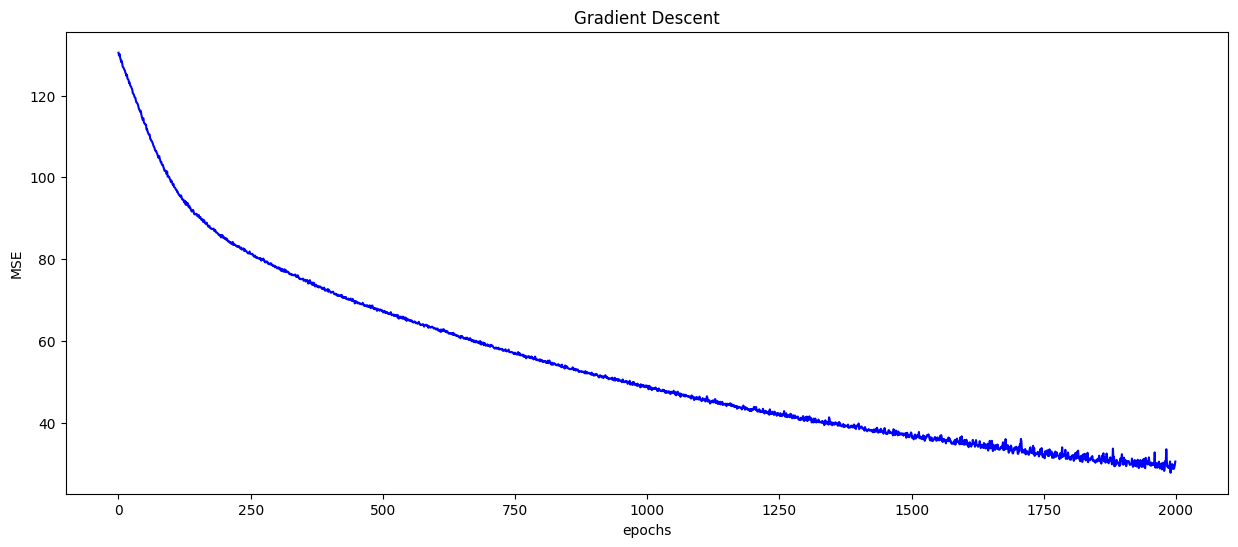

In [26]:
from tqdm import tqdm
from torch import optim
import matplotlib.pyplot as plt
# LEARNING_RATE = 0.000006
LEARNING_RATE = 0.00001
BATCH_SIZE = 60
epochs = 2000

print("Training...")
train_dataset = Dataset(lidar_no_dup)

train_loader = tud.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
model.train()

data = torch.tensor(np.array(lidar_no_dup))
mse_list = []
for epoch in tqdm(range(epochs)):
    # print(f"##### EPOCH {epoch} #####")
    losses = []
    for i, (x, y) in enumerate(iter(train_loader)):
        optimizer.zero_grad()
        outputs = model(x.to(DEVICE))
        loss = criterion(outputs, y.reshape(-1, 1).to(DEVICE))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    loss_avg = sum(losses) / len(losses)
    # print(loss_avg)
    mse_list.append(loss_avg)

fig, ax = plt.subplots(figsize=(15, 6))

ax.set(xlabel='epochs', ylabel='MSE', title='Gradient Descent')

ax.plot(range(epochs), mse_list, 'blue')

plt.show()

In [28]:
import pickle
# open a file, where you ant to store the data
file = open('../models/model.pickle', 'wb')

# dump information to that file
pickle.dump(model, file)

# close the file
file.close()

In [27]:

# open a file, where you stored the pickled data
file = open('../models/model.pickle', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()
